<div class="info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<div><b>Описание проекта</b></div>
<p>Речь идет об интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).</p> 
<p>Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</p>

<p>Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.</p>
    
<p>* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</p></div>
</div>

<div class="info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<div><b>Описание данных:</b></div>
Name — название игры<br/>
Platform — платформа<br/>
Year_of_Release — год выпуска<br/>
Genre — жанр игры<br/>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br/>
EU_sales — продажи в Европе (миллионы проданных копий)<br/>
JP_sales — продажи в Японии (миллионы проданных копий)<br/>
Other_sales — продажи в других странах (миллионы проданных копий)<br/>
Critic_Score — оценка критиков (максимум 100)<br/>
User_Score — оценка пользователей (максимум 10)<br/>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br/>
Данные за 2016 год могут быть неполными.</div>

<div class="info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<div><b>Стадии выполнения проекта:</b></div>
    <p></p>
    <div>Шаг 1. Изучение общей информации с базы данных</div>
    <div>Шаг 2. Подготовка данных</div> 
    <div>Шаг 3. Исследовательский анализ данных.</div>
    <div>Шаг 4. Составление портрета пользователя каждого региона.</div>
    <div>Шаг 5. Проверка гипотез</div>
    <div>Шаг 6. Общий вывод</div>
</div>

In [75]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime
import pprint
from pymystem3 import Mystem
from collections import Counter
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger

### Шаг 1. Изучение общей информации с базы данных

In [76]:
games = pd.read_csv('C:/Users/User/Desktop/YandexPracticum/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Таблица данных состоит из 11 столбцов.<br/>
Есть пропуски в столбцах, которые надо обработать.<br/>
Типы данных тоже надо будет посмотреть и поменять где требуется.<br/></div>

### Шаг 2. Подготовка данных

#### Замена названий столбцов

In [77]:
# Заменяем названия столбцов (приводим к нижнему регистру)
games = games.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Проверка дубликатов

<font color='Blue'><b>Проверка явных дубликатов.</b></font><br>

In [78]:
#games.duplicated().sum()
duplicateRows = games[games.duplicated ()]
print(duplicateRows)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


<font color='Blue'><b>Явных дубликатов не обнаружено<b/></font><br>

<font color='Blue'><b>Выявление неявных дубликатов.</b></font><br>

In [79]:
# Проверка по имени, платформе и году релиза одновременно.

games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()

duplicateRows_two = games[games.duplicated(['name', 'platform', 'year_of_release'])]

display(duplicateRows_two)
duplicateRows_two.count()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
dtype: int64

<font color='Blue'><b>Результат кода - две строки с неявными дубликатами.<b/></font><br>

In [80]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

<font color='Blue'><b>Удалили две строки с неявными дубликатами.<b/></font><br>

#### Изучение пропусков в столбцах

In [81]:
# Смотрим в каком столбце есть пропуски
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

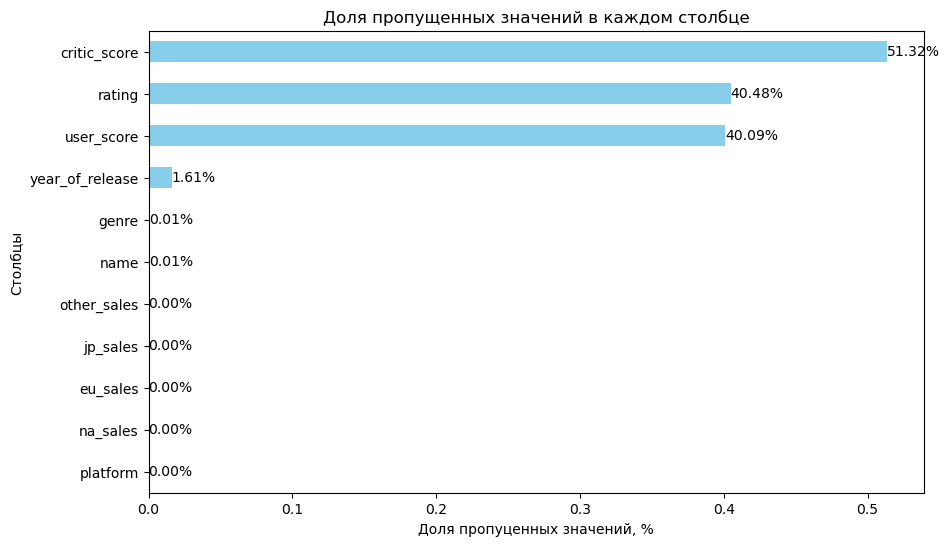

In [82]:
# визуализация долей пропусков в столбцах
games_num_missing = games.isna().mean().round(4)   #.transform(lambda x: '{:,.2%}'.format(x))

plt.figure(figsize=(10, 6))
ax = games_num_missing.sort_values().plot(kind='barh', color='skyblue')

for index, value in enumerate(games_num_missing.sort_values()):
    ax.text(value, index, '{:.2%}'.format(value), ha='left', va='center', fontsize=10)

plt.title('Доля пропущенных значений в каждом столбце')
plt.xlabel('Доля пропуценных значений, %')
plt.ylabel('Столбцы')
plt.show()

В столбцах <b>critic_score</b>, <b>rating</b> и <b>user_score</b> отсутствует большое количество данных.<br/>
Смотрим хронологию данных. Отчет начинается с начала 1980-х годов. Раньше, наверное, из-за недоступного интернета не было такой опции, чтобы игры оценивались критиками и самими игроманами. Такая же ситуация и с рейтингом (ESRB) в раннем периоде.<br/><br/>
Предлагается заполнить пропуски следующим образом:<br/>
    * Столбец <b>critic_score</b> (оценка критиков) заполним значением, которое не попадает в общий диапазон, например оценкой минус 1, принимая во внимание, что отсчет баллов обычно начинается с нуля. Главное, чтобы можно было их обрабатывать/анализировать вместе с другими строками.<br/>
    * Столбец <b>user_score</b> (оценка пользователя) заполним так же, как столбец <b>'critic_score'</b>. <br/>
    * Колонку <b>rating</b> (рейтинг ESRB) заполним значением 'unrated' ("неоцененный").<br/>

<font color='Blue'><b>
Переделал код для расчета долей пропусков и визуализации. Обратился к шпаргалкам практикума и к туториалам в интернете:<b/><br/><p><p/>
    https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab <br/>
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html, <br/>
    https://www.youtube.com/watch?v=7ZHRM0Fl2S8, <br/>
    https://skine.ru/articles/79306/, <br/>
    https://www.w3schools.com/python/matplotlib_grid.asp.<br/>
</font><br>

<div class="info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
(!) Проверим, действительно ли раньше не ставили рейтинги и баллы...

In [83]:
# games.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

<div class="info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
Теория не подтвердилась, так как среди свежих игр тоже есть неоцененные...

#### Обработка пропусков

In [84]:
# раскроем столбец 'critic_score' и посмотрим из каких уникальных значений он состоит
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [85]:
# то же самое и делаем со столбцом 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

- В столбце 'critic_score' есть значения NaN. <br/>
- В столбце 'user_score' кроме NaN присутствует еще и TBD (полагаю расшифровывается как "to be determined").<br/>
<p><p/>
- Заменим и NaN и TBD на -1.<br/>
- Изменим тап данных в столбце 'user_score' на "float"

In [86]:
# Сначала 'tbd' заменяем на 'NaN'
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

In [87]:
# Заполняем'NaN' на число -1
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

# Заполняем'NaN' на 'unrated'
games['rating'] = games['rating'].fillna('unrated')

# Заполним на всякий случай 2 пропуска и в колонке 'name' и 'genre'
#games['name'] = games['name'].fillna('unknown')
#games['genre'] = games['genre'].fillna('title')

# Удаляем строки с 2 пропусками в колонках 'name', 'genre' и 'year_of_release'
games = games.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

<font color='Blue'><b>Удалил строки с пропусками в колонках 'name', 'genre' и 'year_of_release'.<b/></font><br>

In [88]:
# Изменяем тип данных в столбце оценки пользователей
games['user_score'] = games['user_score'].astype(float)

In [89]:
# Cнова проверим пропуска в каждом столбце (колонка 'rating' теперь не должна быть пустой)
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Суммарные продажи

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [90]:
games['cumulative_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,cumulative_sales
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unrated,40.24
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unrated,31.38
5,tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unrated,30.26
6,new super mario bros.,ds,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unrated,28.31


<font color='Blue'>
    Вторая часть проекта заканчивается на этом месте: заполнили пропуски, проверили дубликаты, изменили тип данных в одном столбце, добавили колонку с суммарной продажей.</font>

In [91]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16443 non-null  object 
 1   platform          16443 non-null  object 
 2   year_of_release   16443 non-null  float64
 3   genre             16443 non-null  object 
 4   na_sales          16443 non-null  float64
 5   eu_sales          16443 non-null  float64
 6   jp_sales          16443 non-null  float64
 7   other_sales       16443 non-null  float64
 8   critic_score      16443 non-null  float64
 9   user_score        16443 non-null  float64
 10  rating            16443 non-null  object 
 11  cumulative_sales  16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa 

<font color='Blue'><b>Удалил пропуски в столбце "Год релиза"<b/></font>

### Шаг 3. Исследовательский анализ данных

#### График производства игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

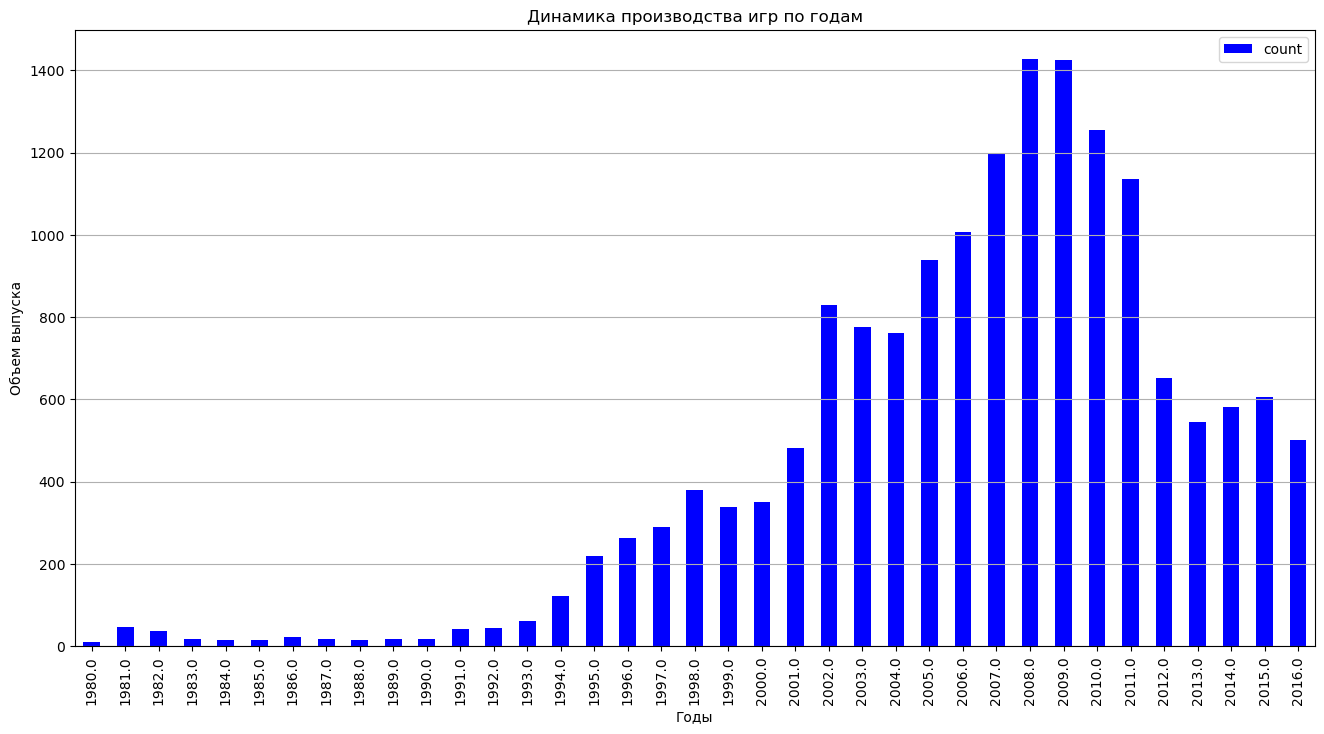

In [92]:
# Код для построения диаграммы производства игр по годам
games_total_by_year = games.groupby('year_of_release').agg({'platform': 'count'})
games_total_by_year = games_total_by_year.rename(columns={'platform': 'count',})

games_total_by_year.plot(kind='bar', color='blue', figsize=(16, 8))

plt.title('Динамика производства игр по годам')
plt.xlabel('Годы')
plt.ylabel('Объем выпуска')
plt.grid(axis = 'y')
plt.show()

По графику видно, что до появления MS Windows, до 1994 г, на рынке выпускалось мало игр, затем пошел рост, который продолжался до 2009 года. <br>
Спад пошел с начала массового производства смартфонов (iPhone, Samsung etc.) и появления мобильных игр и приложений.

#### Объем производства игр по платформам

Как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [93]:
# # График сравнения суммарных продаж по платформам 

# sample_bar_chart('platform', 'sum', 'cumulative_sales')
# plt.title('Объем суммарных продаж по платформам')
# plt.xlabel('ОБъем продаж')
# plt.ylabel('Платформа')
# plt.show()

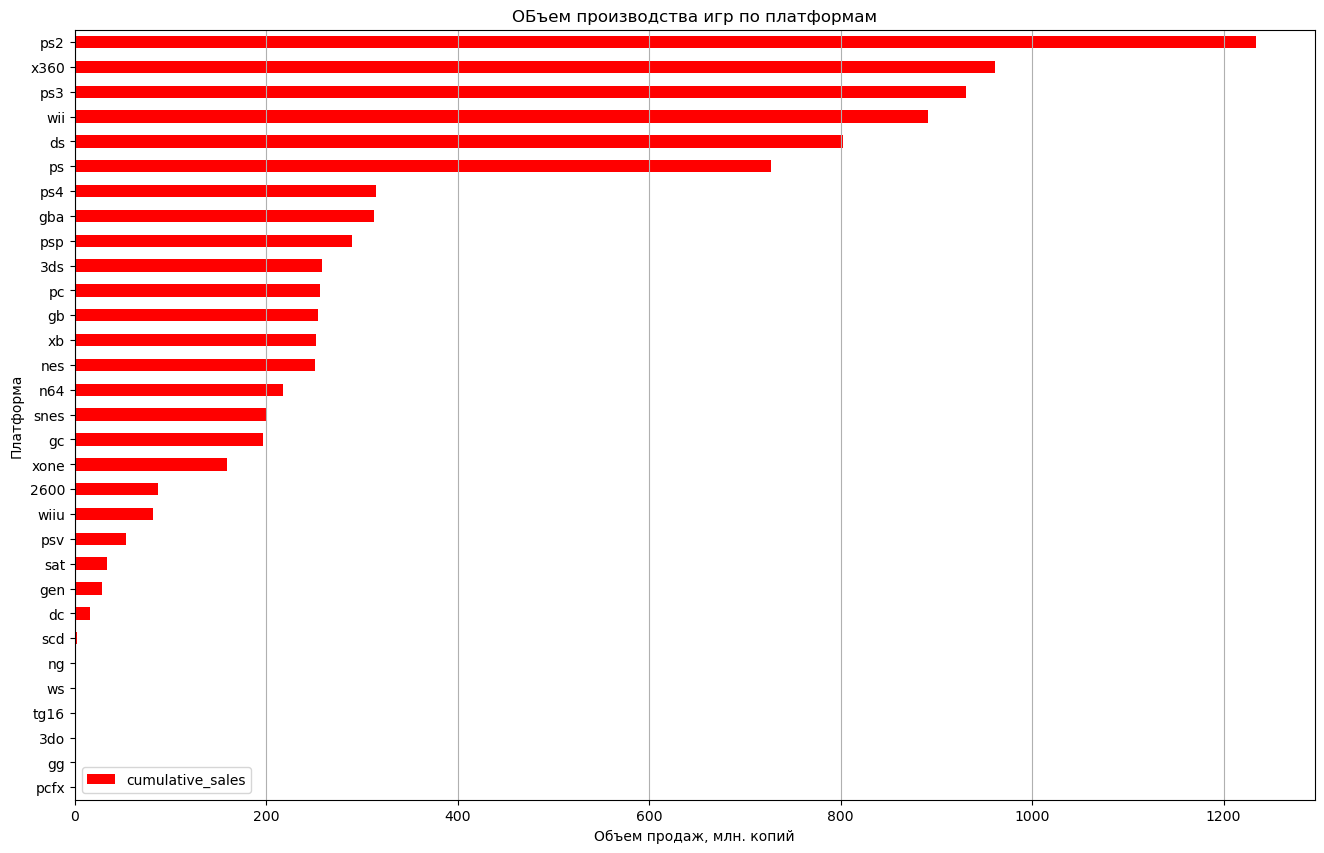

In [94]:
platform_total_by_year = games.groupby('platform').agg({'cumulative_sales': 'sum'})
#platform_total_by_year = platform_total_by_year.rename(columns={'genre': 'count',})

platform_total_by_year.sort_values('cumulative_sales').plot(kind='barh', color='red', figsize=(16, 10))

plt.title('ОБъем производства игр по платформам')
plt.xlabel('Объем продаж, млн. копий')
plt.ylabel('Платформа')
plt.grid(axis = 'x')
plt.show()

<font color='Blue'><b>Диаграмма показывает, что 5 игровых платформ в топе с объемом продаж 800+ млн копий<br/></font>

In [95]:
# Для начала:
# Функция, которая будет возвращать нужную сводную таблицу и выводить данные с 2000 года

def annual_cumulative_sales_by_platform(name, games):
    period = games[(games['platform'] == name) & (games['year_of_release'] > 2000)]
    period_total = period.pivot_table(index='year_of_release', values='cumulative_sales', aggfunc='sum').\
        sort_values('year_of_release', ascending=False)
    return period_total


In [96]:
# # Таблица по платформам и их обшим продажам. Отсортируем их по убыванию и оставим только топовые.

top_platforms = games.pivot_table(index='platform', values='cumulative_sales', aggfunc='sum').\
    sort_values(by='cumulative_sales', ascending=False).head(10)
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)

,platform,cumulative_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


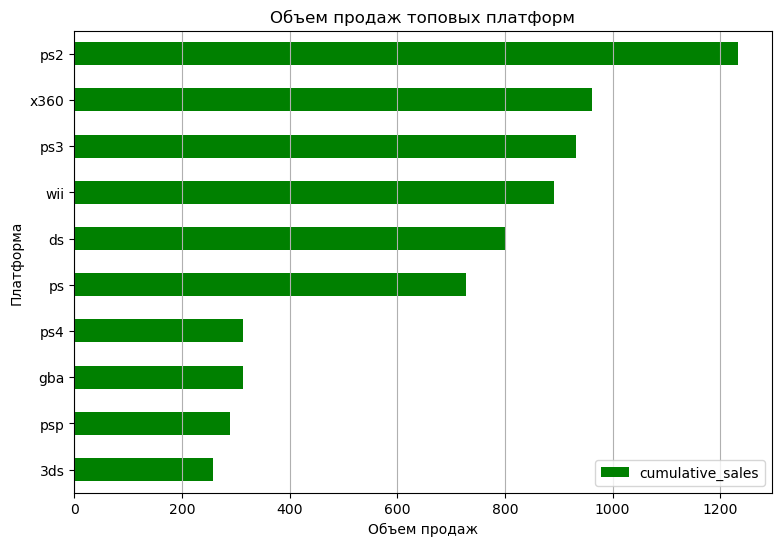

In [97]:
display(top_platforms)

top_platforms = top_platforms.groupby('platform').agg({'cumulative_sales': 'sum'})
top_platforms.sort_values('cumulative_sales').plot(kind='barh', color='green', figsize=(9, 6))

plt.title('Объем продаж топовых платформ')
plt.xlabel('Объем продаж')
plt.ylabel('Платформа')
plt.grid(axis = 'x')
plt.show()

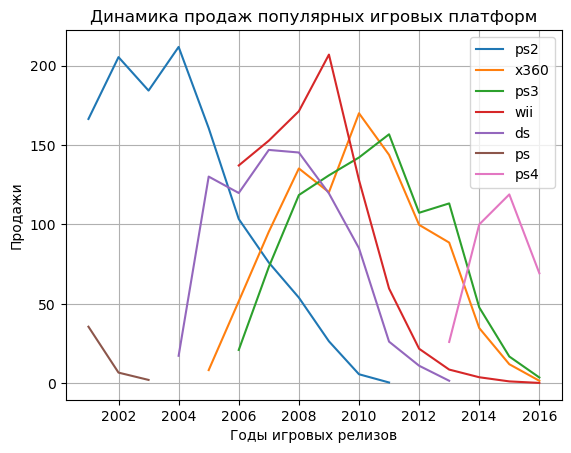

In [98]:
# Топовые игровые платформы и динамика их продаж за последние 12 лет

top_platforms = games.pivot_table(index='platform', values='cumulative_sales', aggfunc='sum').\
    sort_values(by='cumulative_sales', ascending=False).head(7)
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)

#display(top_platforms)

for i in list(top_platforms['platform']):
    sns.lineplot(data=annual_cumulative_sales_by_platform(i,games)['cumulative_sales'], label=i)
    #plt.legend()

#plt.figure(figsize=(16,8))
plt.title('Динамика продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
plt.grid()
plt.show()

In [99]:
# воспользуюсь твоим кодом для подсчета среднего жизненного цикла топовой игры

df_top_5_platforms = games[games['platform'].isin(['ps2','x360','ps3','wii','ds'])]

time_life_top_platforms = df_top_5_platforms.pivot_table(index='platform', \
                                                    values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life_top_platforms['life'] = \
time_life_top_platforms['max'] - time_life_top_platforms['min'] + 1

print('Средний жизненный цикл топовой платформы:', time_life_top_platforms['life'].median(), 'лет')
display(time_life_top_platforms)

Средний жизненный цикл топовой платформы: 12.0 лет


,platform,min,max,life
,,year_of_release,year_of_release,
0,ds,1985.0,2013.0,29.0
1,ps2,2000.0,2011.0,12.0
2,ps3,2006.0,2016.0,11.0
3,wii,2006.0,2016.0,11.0
4,x360,2005.0,2016.0,12.0


<font color='Blue'><b>
Вывод: <br/>
<p><p/>
- Жизненный цикл топовой игровой платформы около 12 лет.<br/> 
- Пик продаж по каждой платформе приходится на 5-й год после релиза<br/>
- К 2016 году общий спад игр Wii, X360 и PS3. На смену пришел PS4, а также мобильные приложения.<br/>
- Технические параметры игр растут и игровые платформы приходится тоже подстраивать под эти требования.<br/><br/></font>

In [100]:
# Комментарий ревьюера - срок жизни проекта
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Исследования данных за актуальный период

Возьмите данные за соответствующий актуальный период.<br/> 
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. <br/>
Основной фактор — эти данные помогут построить прогноз на 2017 год.<br/>
Не учитывайте в работе данные за предыдущие годы.<br/>
Какие платформы лидируют по продажам, растут или падают? <br/>
Выберите несколько потенциально прибыльных платформ.<br/>

In [101]:
def for_actual_period(name, games):
    actual_period = games[(games['platform'] == name) & (games['year_of_release'] > 2011)]
    actual_period_total = actual_period.pivot_table(index='year_of_release', values='cumulative_sales', aggfunc='sum').\
        sort_values('year_of_release', ascending=False).head(7)
    return actual_period_total

In [102]:
platforms = games.pivot_table(index='platform', values='cumulative_sales', aggfunc='sum').\
    sort_values(by='cumulative_sales', ascending=False).head(7)
platforms = platforms.reset_index().rename_axis(None, axis=1)

Platform ps2 does not have 'cumulative_sales' column.
Platform ps does not have 'cumulative_sales' column.


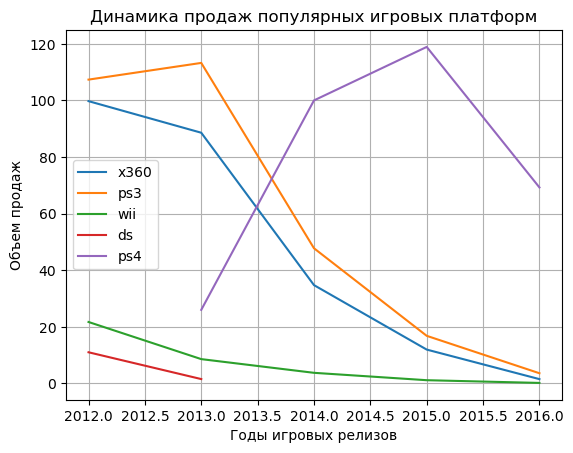

In [103]:
# for i in list(platforms['platform']):
#     sns.lineplot(data=for_actual_period(i,games)['cumulative_sales'], label=i)

for i in list(platforms['platform']):
    data = for_actual_period(i, games).reset_index()
    if 'cumulative_sales' in data.columns:
        sns.lineplot(data=data, x='year_of_release', y='cumulative_sales', label=i)
    else:
        print(f"Platform {i} does not have 'cumulative_sales' column.")

    
plt.title('Динамика продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Объем продаж')
plt.grid()
plt.show()


<font color='Blue'> <b>
На конец 2016 идет спад по всем платформам. <br/>
В тот период лидировал Play Station 4, но кривая продаж тоже идет вниз.<br/>
В общем, весь рынок консольных игр пошёл на спад. Даже продажи PS4 в предыдуещм графике тоже пошли вниз.<br/>
Чтобы увидеть более ясную картину, нужно сравнить динамику консольных игр с динамикой мобильных приложений.<br/><b/></font> 

#### График "ящик с усами"

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [104]:
# Комментарий ревьюера
games.year_of_release.min()

1980.0

In [105]:
# Сохраним в переменной df_top_6_platforms топ 6 платформ и избавимся от выбросов
# df_top_6_platforms = games[games['platform'].isin(['PS2','X360','PS3','Wii','DS', 'PS'])]
df_top_platforms = games[games['year_of_release'] > 2011]
# df_top_6_platforms = df_top_6_platforms[df_top_6_platforms['cumulative_sales'] < 1.5]

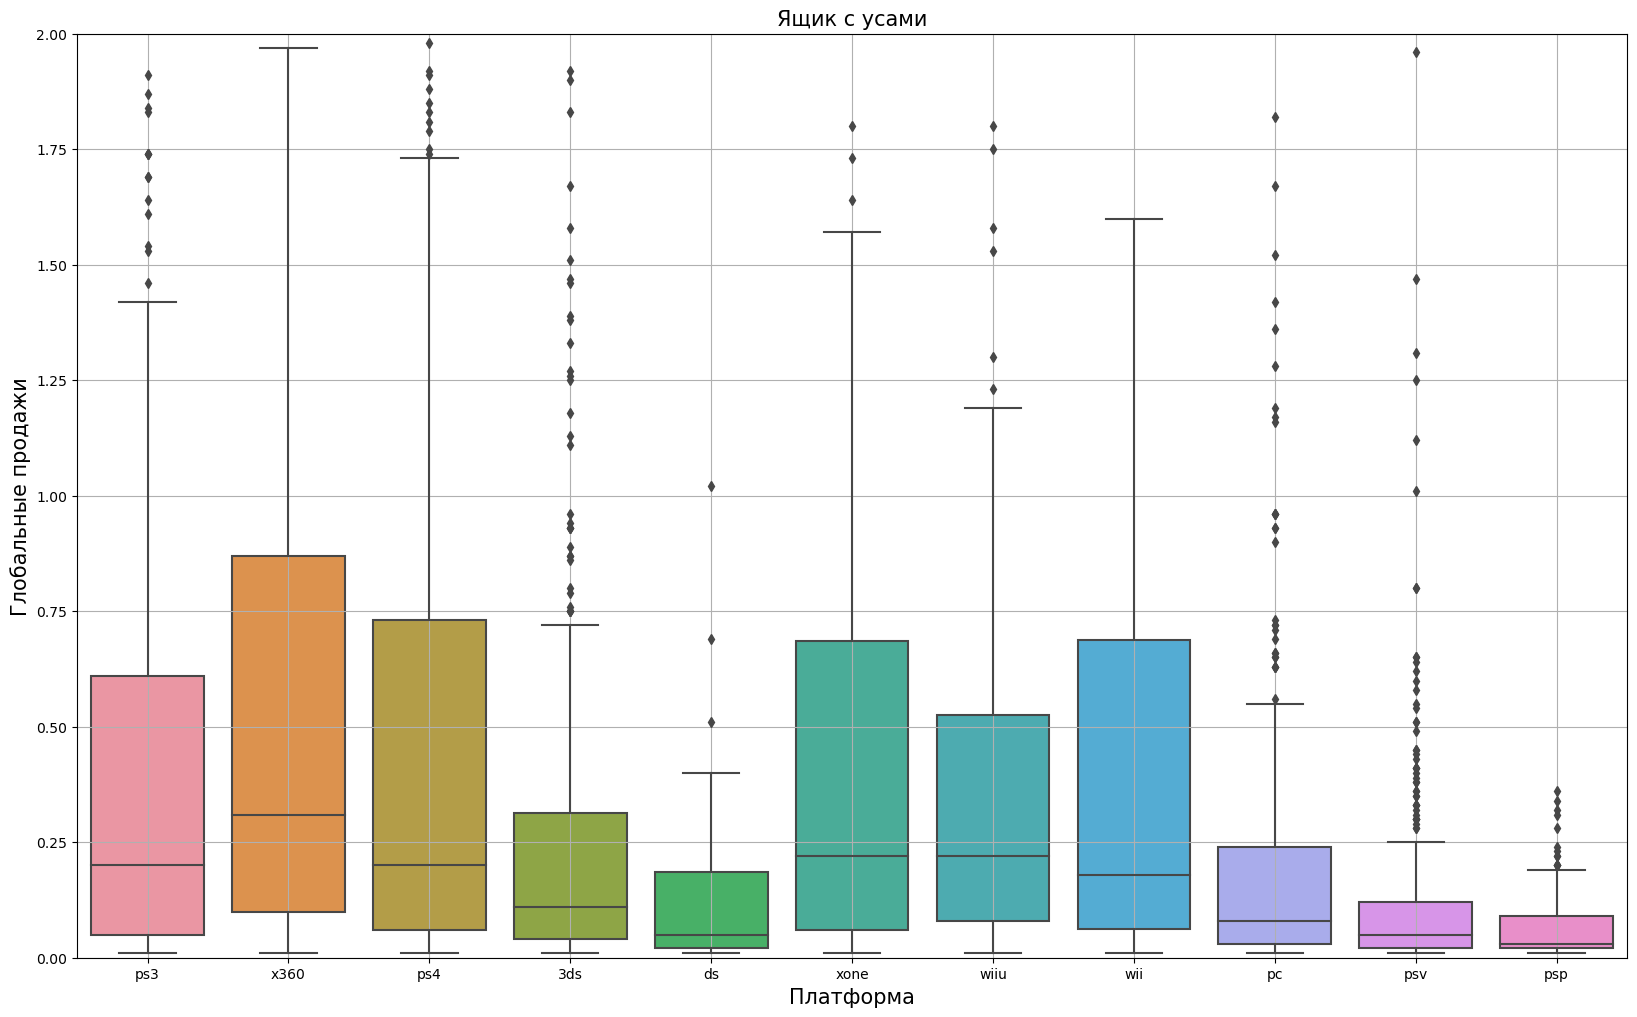

In [106]:
# Ящики с усами 
plt.figure(figsize=(20,12))
sns.boxplot(data=df_top_platforms, x='platform', y='cumulative_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.grid()
plt.ylim(0, 2.0)
plt.show()

<font color='Blue'> <b>Выводы:<b/>
<p><p/>
Самые высокие медианы продаж по платформам X360, PS3, PS4, XOne и Wiu в районе 0,2 и выше.<br/>
У платформ Wiu и PS3 верхняя граница на уровне 1.2 и 1.45 соответственно.<br/>
У X360, PS4, XOne и Wii верхняя граница выше 1.5.<br/>
PSP продавалось хуже всех. Медиана меньше 0,1, верхняя граница - 0,2.</font>

#### Анализ одной популярной платформы

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.<br/>
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. <br/>
Сформулируйте выводы.

Возьмём PS3 как одну из популярных платформ на тот период и сделаем на ней анализ

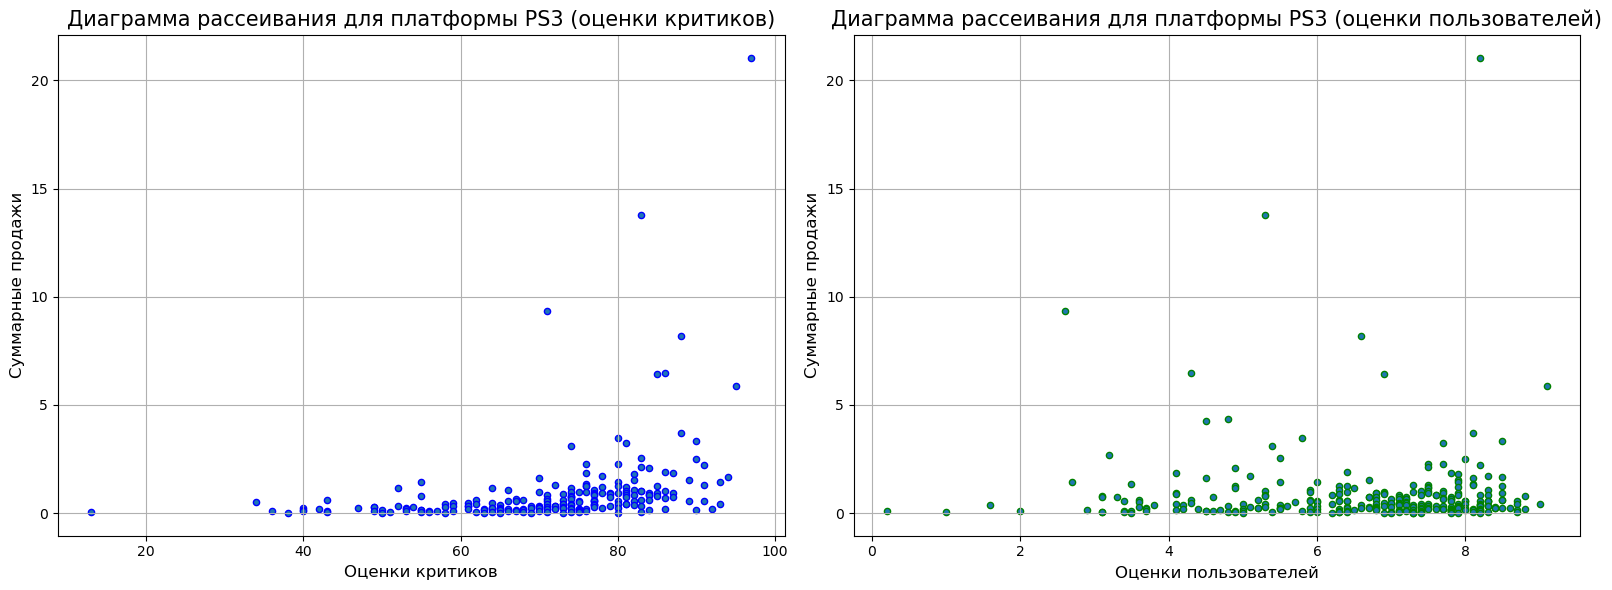

In [107]:
# Диаграммы рассеяния для платформы PS3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Диаграмма для оценок критиков
ps3_platform_cs_critic = games[(games['platform'] == 'ps3') & (games['year_of_release'] > 2011) & (games['critic_score'] > 0)].copy()
ps3_platform_cs_critic.plot(kind='scatter', x='critic_score', y='cumulative_sales', ec='blue', ax=axes[0])

axes[0].set_title('Диаграмма рассеивания для платформы PS3 (оценки критиков)', fontsize=15)
axes[0].set_xlabel('Оценки критиков', fontsize=12)
axes[0].set_ylabel('Суммарные продажи', fontsize=12)
axes[0].grid()

# Диаграмма для оценок пользователей
ps3_platform_cs_user = games[(games['platform'] == 'ps3') & (games['year_of_release'] > 2011) & (games['user_score'] > 0)].copy()
ps3_platform_cs_user.plot(kind='scatter', x='user_score', y='cumulative_sales', ec='green', ax=axes[1])

axes[1].set_title('Диаграмма рассеивания для платформы PS3 (оценки пользователей)', fontsize=15)
axes[1].set_xlabel('Оценки пользователей', fontsize=12)
axes[1].set_ylabel('Суммарные продажи', fontsize=12)
axes[1].grid()

plt.tight_layout()
plt.show()

<font color='Blue'> <b>Вывод по двум диаграммам рассеивания зависимости продажи от оценок пользователей и критиков:<br/>
- Диаграммы рассеивания вверху показывают, что за актуальный период как для одной популярной игры, так и для всех топовых игр за актуальный период болшее влияние оказали оценки критиков.<br/>
- Оценки пользователей тоже положительно повлияли на продажи.<br/>
- Закономерность следующая: Чем выше оценки критиков и пользователей - тем выше продажи. <br/><b/></font>


name                 object
platform             object
year_of_release     float64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating               object
cumulative_sales    float64
dtype: object
year_of_release     float64
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
cumulative_sales    float64
dtype: object


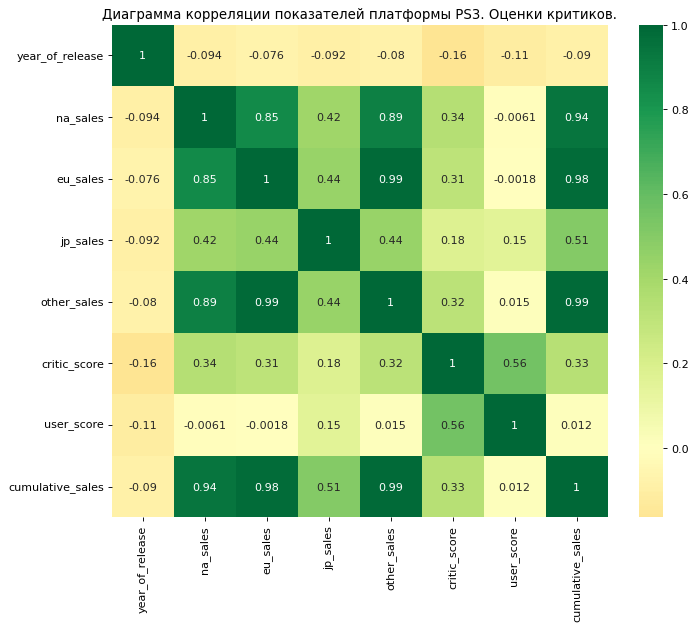

In [114]:
# Корреляция показателей по платформе PS3. Оценки критиков.
print(ps3_platform_cs_critic.dtypes)

# Выбираем только числовые столбцы
numeric_df = ps3_platform_cs_critic.select_dtypes(include=[np.number])

# Проверяем выбранные числовые столбцы
print(numeric_df.dtypes)

# Построение корреляционной матрицы и тепловой карты
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(numeric_df.corr(), xticklabels=numeric_df.corr().columns, yticklabels=numeric_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Диаграмма корреляции показателей платформы PS3. Оценки критиков.', fontsize=12)
plt.show()


name                 object
platform             object
year_of_release     float64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating               object
cumulative_sales    float64
dtype: object
year_of_release     float64
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
cumulative_sales    float64
dtype: object


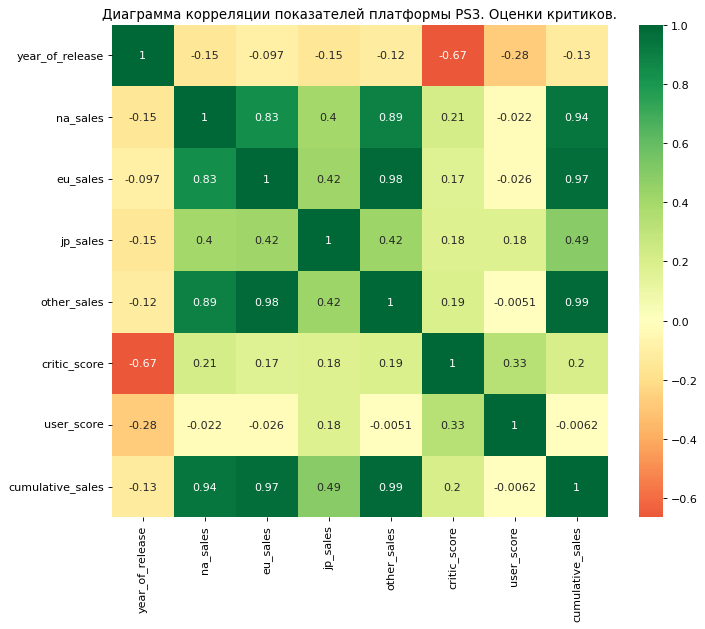

In [115]:
# Корреляция показателей по платформе PS3. Оценки пользователей.
print(ps3_platform_cs_user.dtypes)

# Выбираем только числовые столбцы
numeric_df = ps3_platform_cs_user.select_dtypes(include=[np.number])

# Проверяем выбранные числовые столбцы
print(numeric_df.dtypes)

# Построение корреляционной матрицы и тепловой карты
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(numeric_df.corr(), xticklabels=numeric_df.corr().columns, yticklabels=numeric_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Графика
plt.title('Диаграмма корреляции показателей платформы PS3. Оценки критиков.', fontsize=12)
plt.show()


Коллеряция по рассматриваемым данным:

* Корреляция показывает, что Оценка критиков сильнее влияет на продажи, чем оценка пользователей.

#### Продажи игр на других платформах

In [116]:
games[(games['platform'] == 'ps2')].count()

name                2127
platform            2127
year_of_release     2127
genre               2127
na_sales            2127
eu_sales            2127
jp_sales            2127
other_sales         2127
critic_score        2127
user_score          2127
rating              2127
cumulative_sales    2127
dtype: int64

Недостаточно данных для платформы ds в данный период. Пропускаем...
Недостаточно данных для платформы ps2 в данный период. Пропускаем...
Недостаточно данных для платформы ps2 в данный период. Пропускаем...


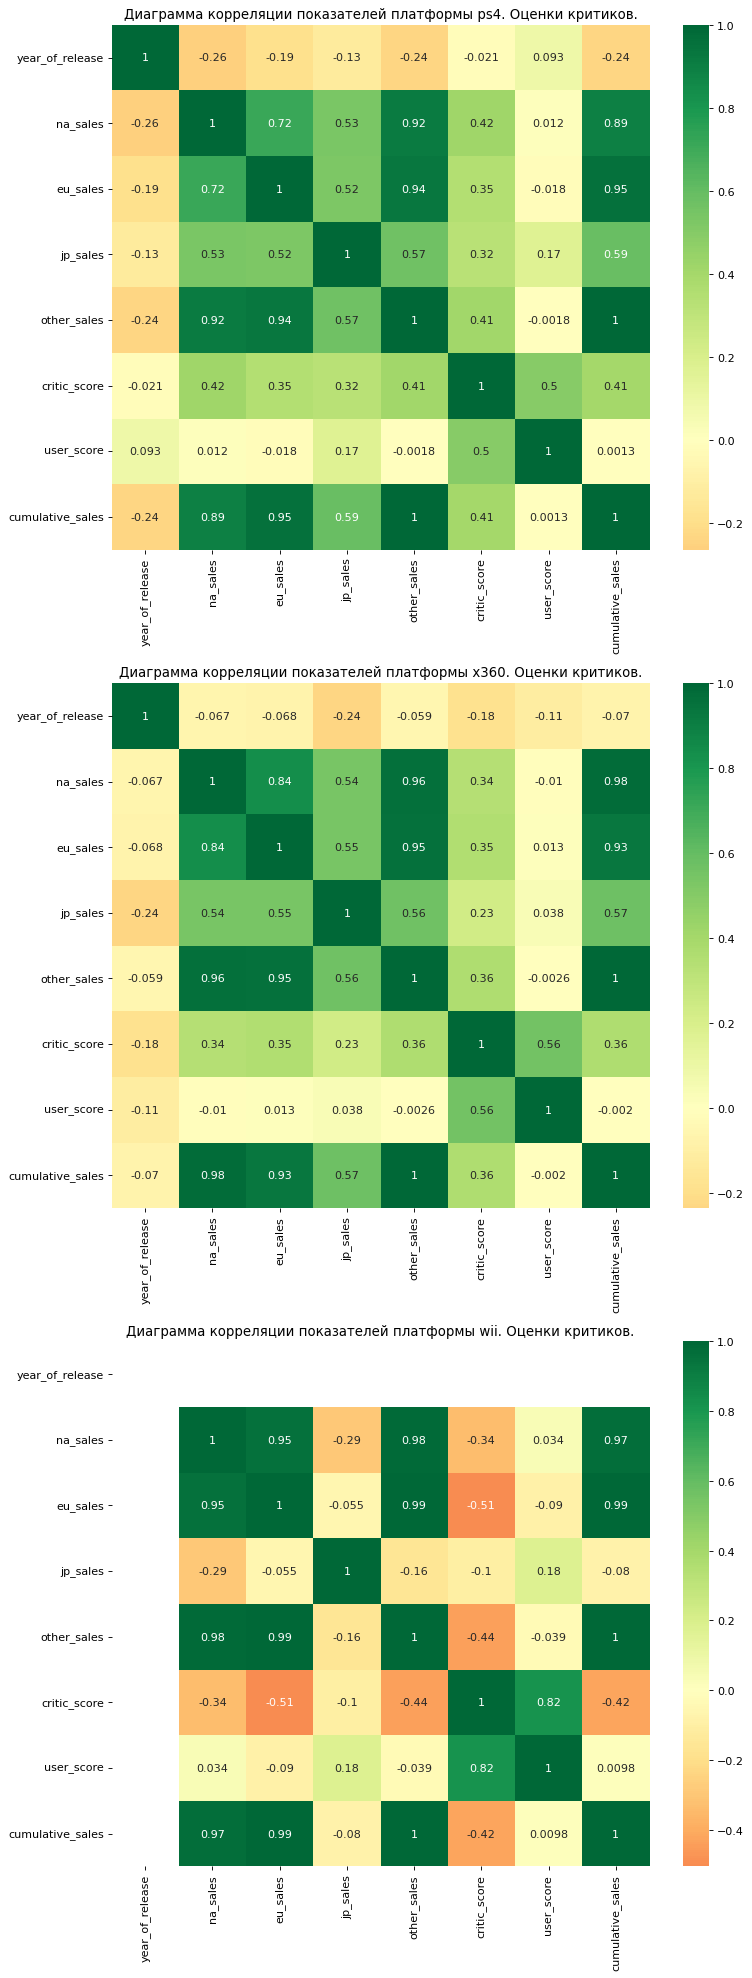

In [121]:
# функция для фильтрации данных по платформе и типу оценки
def filter_platform_data(games, platform, score_type):
    condition = (games['platform'] == platform) & (games[score_type] > 0) & (games['year_of_release'] > 2011)
    filtered_data = games[condition].copy()
    
    if filtered_data.empty:
        print(f"Недостаточно данных для платформы {platform} в данный период. Пропускаем...")
    
    return filtered_data

five_platforms = ['ps4', 'x360', 'wii', 'ds', 'ps2']

# Создаём суб-графики на основе количества платформ
fig, axes = plt.subplots(nrows=len(five_platforms), figsize=(10, 8 * len(five_platforms)), dpi=80)

# Тепловая карта по каждой платформе
for i, platform in enumerate(five_platforms):
    critic_score_platform = filter_platform_data(games, platform, 'critic_score')
    
    if not critic_score_platform.empty and len(critic_score_platform) > 1:
        # Выбор только числовых столбцов
        numeric_critic_score_platform = critic_score_platform.select_dtypes(include=[np.number])
        
        if not numeric_critic_score_platform.empty and len(numeric_critic_score_platform.columns) > 1:
            sns.heatmap(numeric_critic_score_platform.corr(), 
                        xticklabels=numeric_critic_score_platform.corr().columns, 
                        yticklabels=numeric_critic_score_platform.corr().columns, 
                        cmap='RdYlGn', center=0, annot=True, ax=axes[i])
            
            axes[i].set_title(f'Диаграмма корреляции показателей платформы {platform}. Оценки критиков.')
        else:
            print(f"Недостаточно числовых данных для платформы {platform} для построения корреляционной матрицы. Пропускаем...")
            fig.delaxes(axes[i])
    else:
        print(f"Недостаточно данных для платформы {platform} в данный период. Пропускаем...")
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


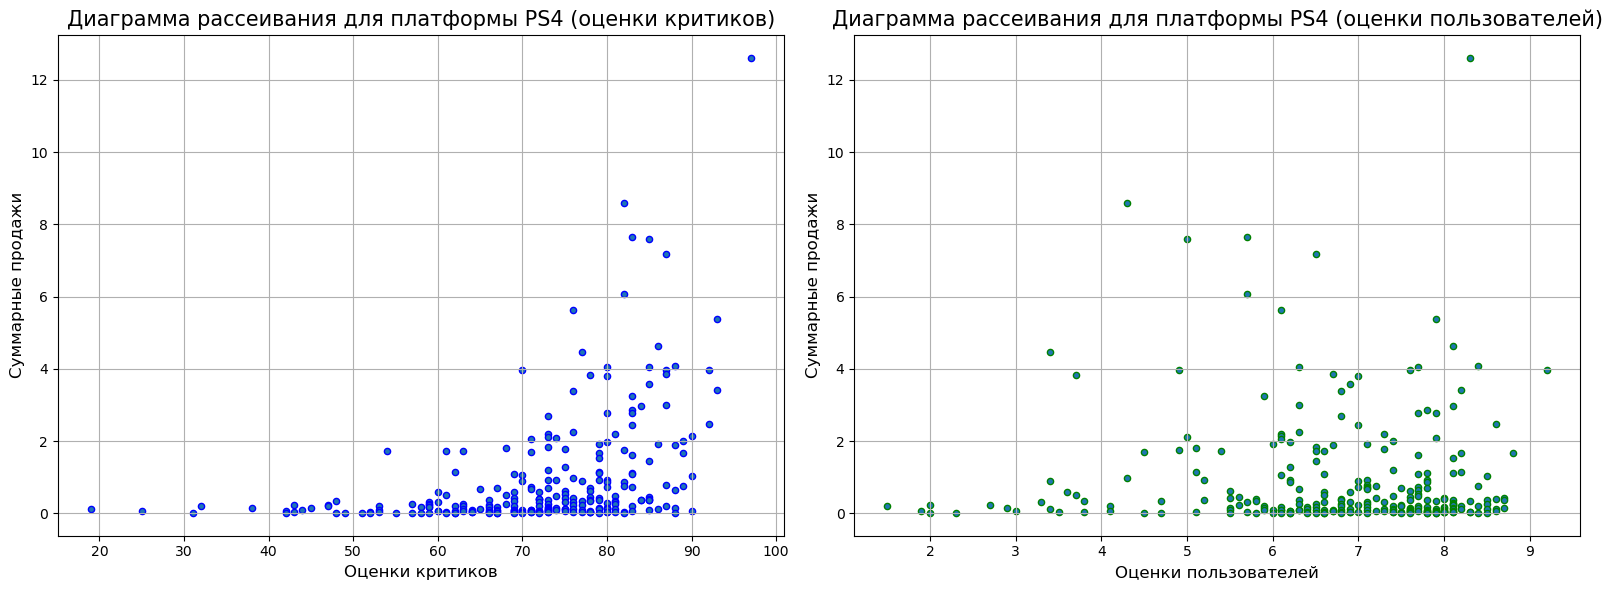

In [122]:
# Диаграммы рассеяния для платформы PS4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Диаграмма для оценок критиков
ps4_platform_cs_critic = games[(games['platform'] == 'ps4') & (games['year_of_release'] > 2011) & (games['critic_score'] > 0)].copy()
ps4_platform_cs_critic.plot(kind='scatter', x='critic_score', y='cumulative_sales', ec='blue', ax=axes[0])

axes[0].set_title('Диаграмма рассеивания для платформы PS4 (оценки критиков)', fontsize=15)
axes[0].set_xlabel('Оценки критиков', fontsize=12)
axes[0].set_ylabel('Суммарные продажи', fontsize=12)
axes[0].grid()

# Диаграмма для оценок пользователей
ps4_platform_cs_user = games[(games['platform'] == 'ps4') & (games['year_of_release'] > 2011) & (games['user_score'] > 0)].copy()
ps4_platform_cs_user.plot(kind='scatter', x='user_score', y='cumulative_sales', ec='green', ax=axes[1])

axes[1].set_title('Диаграмма рассеивания для платформы PS4 (оценки пользователей)', fontsize=15)
axes[1].set_xlabel('Оценки пользователей', fontsize=12)
axes[1].set_ylabel('Суммарные продажи', fontsize=12)
axes[1].grid()

plt.tight_layout()
plt.show()


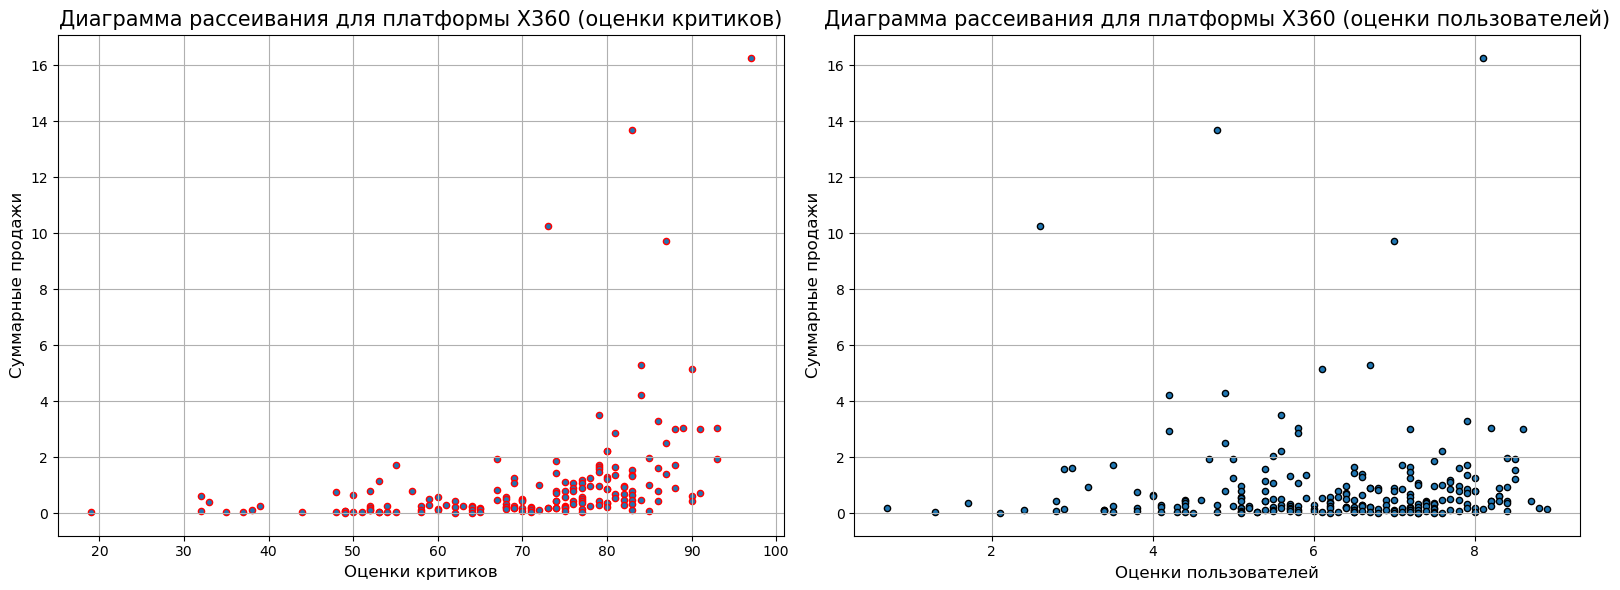

In [123]:
# Диаграммы рассеяния для платформы X360
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Диаграмма для оценок критиков
x360_platform_cs_critic = games[(games['platform'] == 'x360') & (games['year_of_release'] > 2011) & (games['critic_score'] > 0)].copy()
x360_platform_cs_critic.plot(kind='scatter', x='critic_score', y='cumulative_sales', ec='red', ax=axes[0])

axes[0].set_title('Диаграмма рассеивания для платформы X360 (оценки критиков)', fontsize=15)
axes[0].set_xlabel('Оценки критиков', fontsize=12)
axes[0].set_ylabel('Суммарные продажи', fontsize=12)
axes[0].grid()

# Диаграмма для оценок пользователей
x360_platform_cs_user = games[(games['platform'] == 'x360') & (games['year_of_release'] > 2011) & (games['user_score'] > 0)].copy()
x360_platform_cs_user.plot(kind='scatter', x='user_score', y='cumulative_sales', ec='black', ax=axes[1])

axes[1].set_title('Диаграмма рассеивания для платформы X360 (оценки пользователей)', fontsize=15)
axes[1].set_xlabel('Оценки пользователей', fontsize=12)
axes[1].set_ylabel('Суммарные продажи', fontsize=12)
axes[1].grid()

plt.tight_layout()
plt.show()


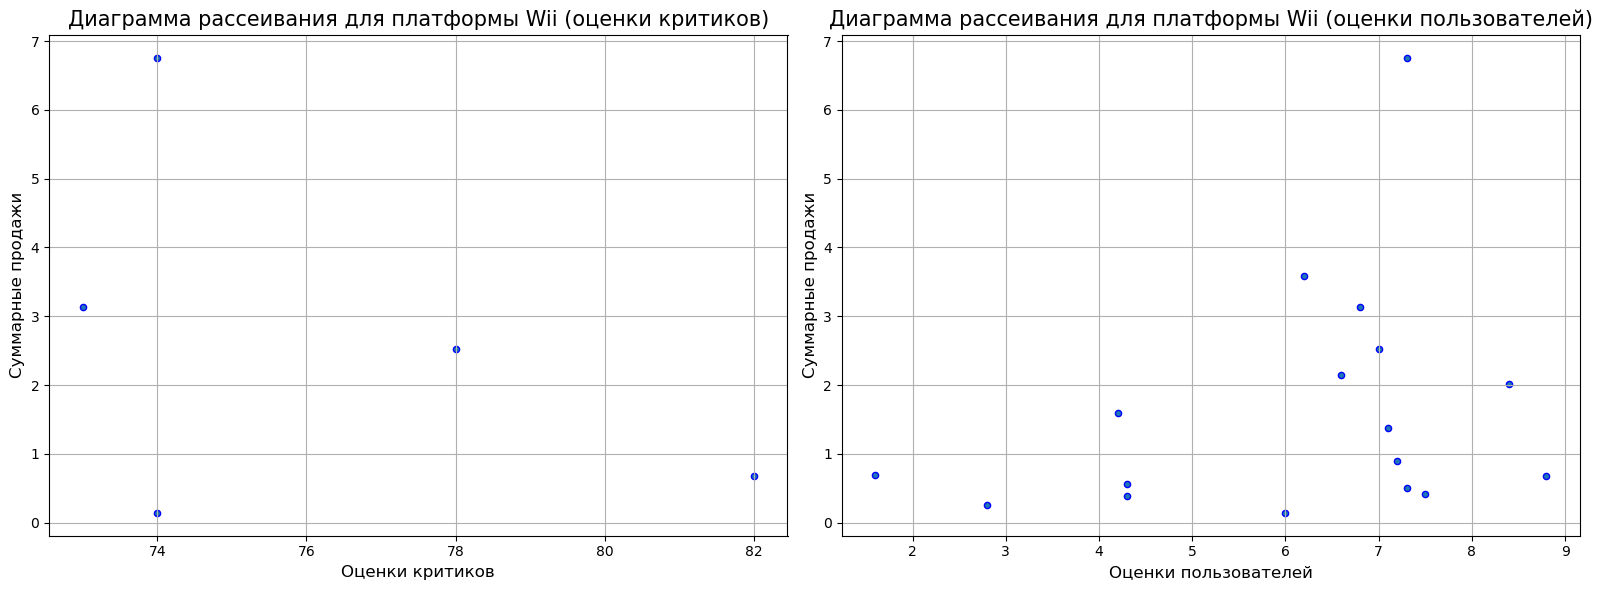

In [124]:
# Диаграммы рассеяния для платформы Wii
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Диаграмма для оценок критиков
wii_platform_cs_critic = games[(games['platform'] == 'wii') & (games['year_of_release'] > 2011) & (games['critic_score'] > 0)].copy()
wii_platform_cs_critic.plot(kind='scatter', x='critic_score', y='cumulative_sales', ec='blue', ax=axes[0])

axes[0].set_title('Диаграмма рассеивания для платформы Wii (оценки критиков)', fontsize=15)
axes[0].set_xlabel('Оценки критиков', fontsize=12)
axes[0].set_ylabel('Суммарные продажи', fontsize=12)
axes[0].grid()

# Диаграмма для оценок пользователей
wii_platform_cs_user = games[(games['platform'] == 'wii') & (games['year_of_release'] > 2011) & (games['user_score'] > 0)].copy()
wii_platform_cs_user.plot(kind='scatter', x='user_score', y='cumulative_sales', ec='blue', ax=axes[1])

axes[1].set_title('Диаграмма рассеивания для платформы Wii (оценки пользователей)', fontsize=15)
axes[1].set_xlabel('Оценки пользователей', fontsize=12)
axes[1].set_ylabel('Суммарные продажи', fontsize=12)
axes[1].grid()

plt.tight_layout()
plt.show()

<font color='Blue'> 
    <b>rev.02 -<br/>
       По платформе PS4 и оценка критиков и оценка пользователей оказали положительное влияние на продажи.<br/>
       По платформе X360 критики больше повлияли на продажи, чем пользователи.<br/>
       По платформе Wii оценки критиков и пользователей оказали очень слабое влияние, наверное, из-за региона продаж, где особо не обращают внимания на оценки.<br/><b/></font>

Расчет по Платформе 3ds


user_score          0.222078
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

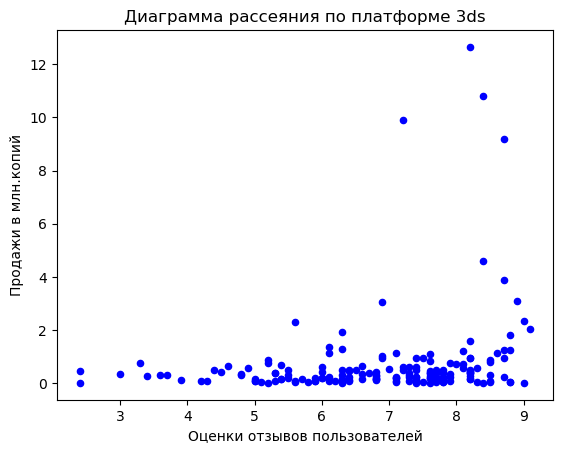

critic_score        0.34874
cumulative_sales    1.00000
Name: cumulative_sales, dtype: float64

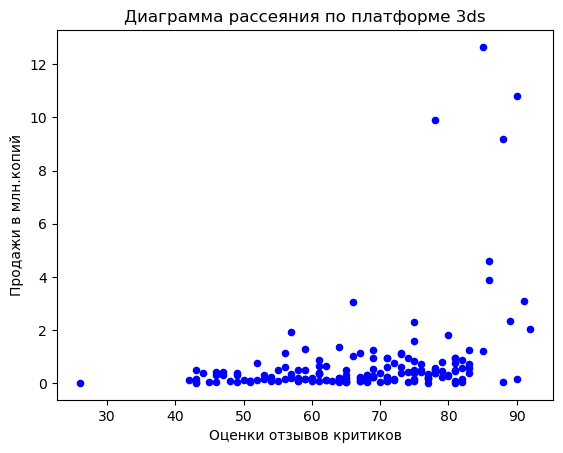

Расчет по Платформе ds


user_score          0.281029
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

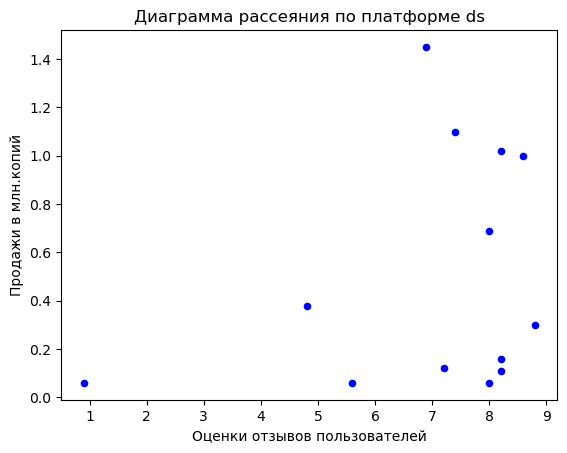

critic_score        0.261166
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

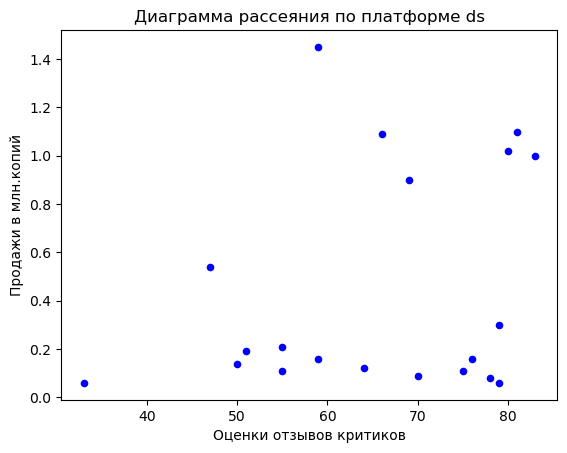

Расчет по Платформе pc


user_score         -0.048967
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

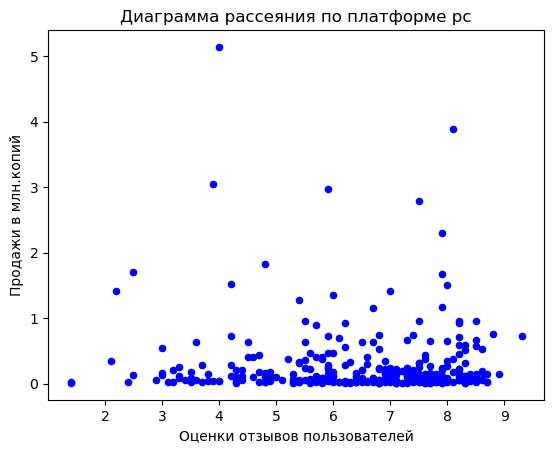

critic_score        0.314185
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

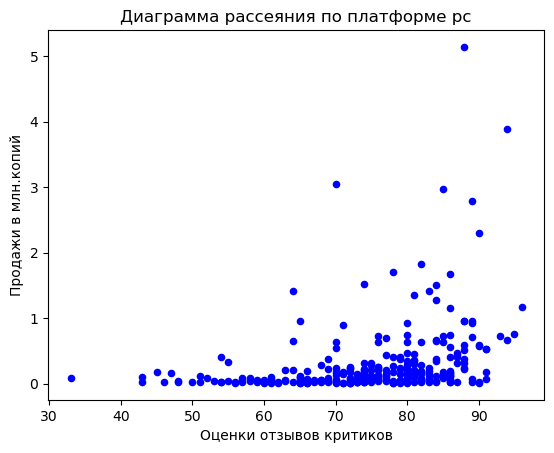

Расчет по Платформе ps2
Для платформы ps2 не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы ps2 не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе ps3


user_score          0.013221
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

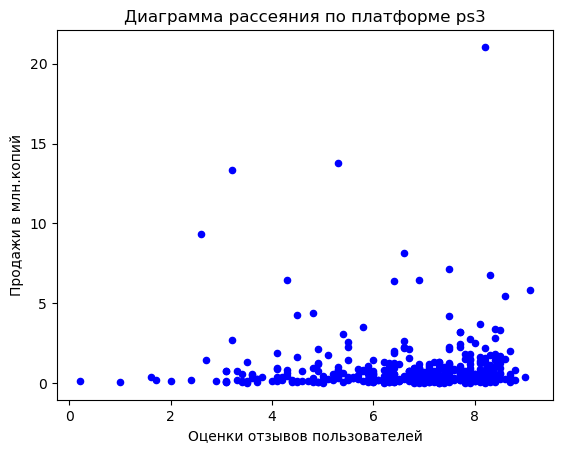

critic_score        0.381991
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

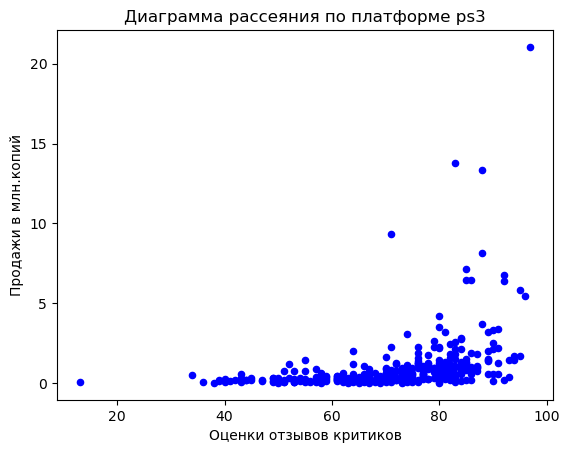

Расчет по Платформе ps4


user_score         -0.031957
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

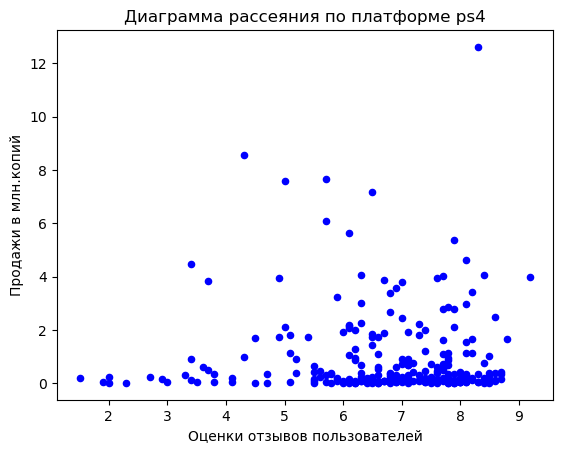

critic_score        0.406568
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

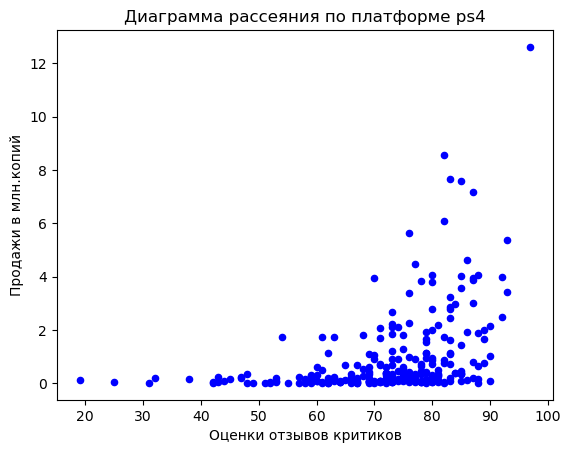

Расчет по Платформе psp


user_score          0.010035
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

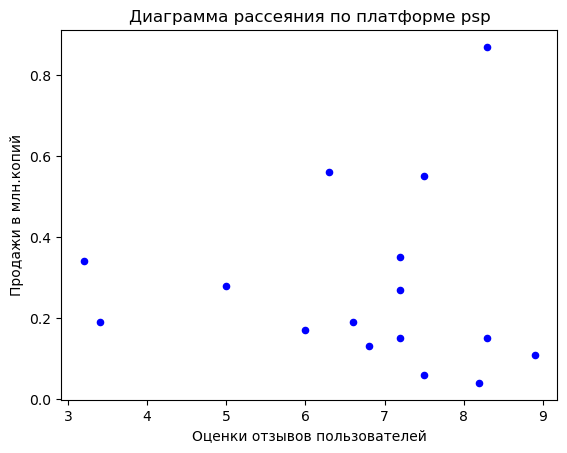

critic_score        0.358138
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

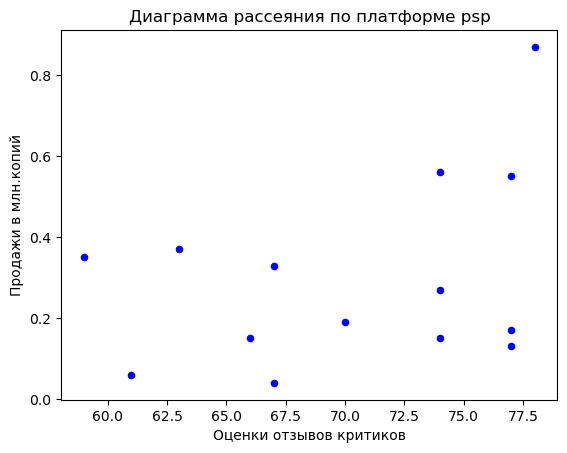

Расчет по Платформе psv


user_score          0.013489
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

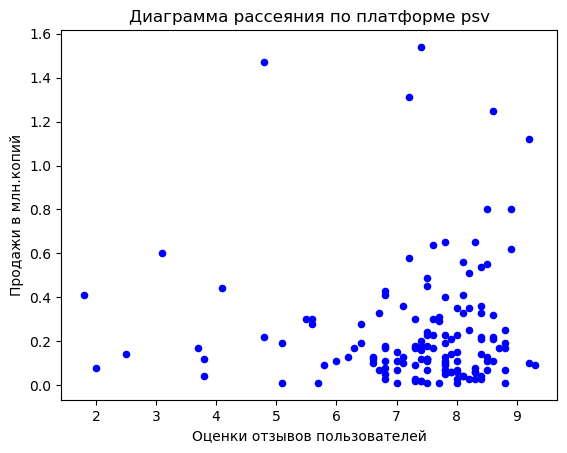

critic_score        0.131763
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

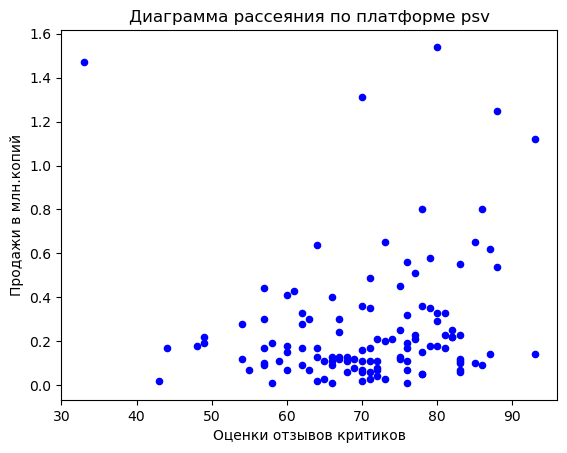

Расчет по Платформе wii


user_score          0.145504
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

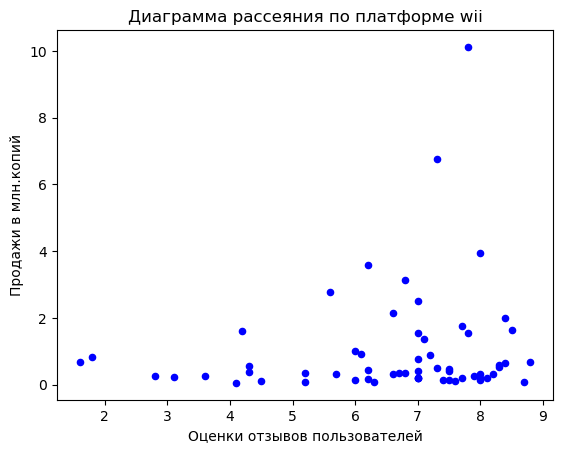

critic_score        0.292269
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

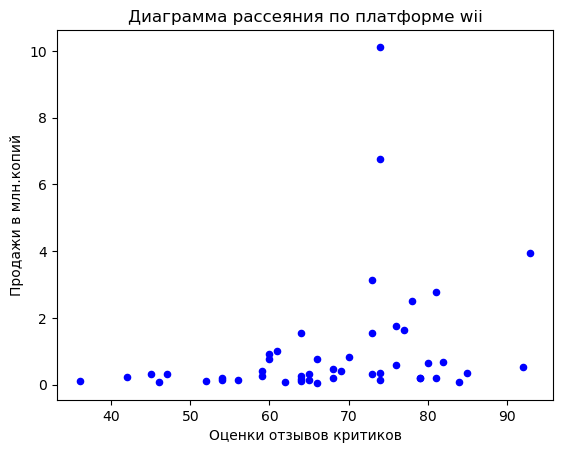

Расчет по Платформе wiiu


user_score          0.400219
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

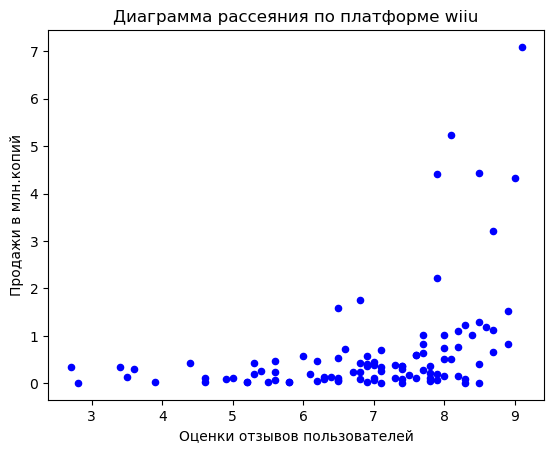

critic_score        0.34838
cumulative_sales    1.00000
Name: cumulative_sales, dtype: float64

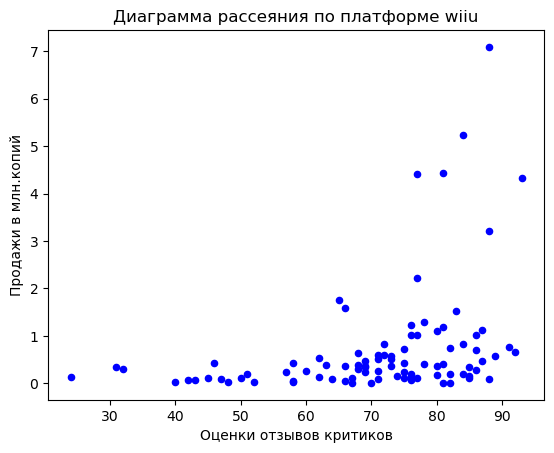

Расчет по Платформе x360


user_score          0.038918
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

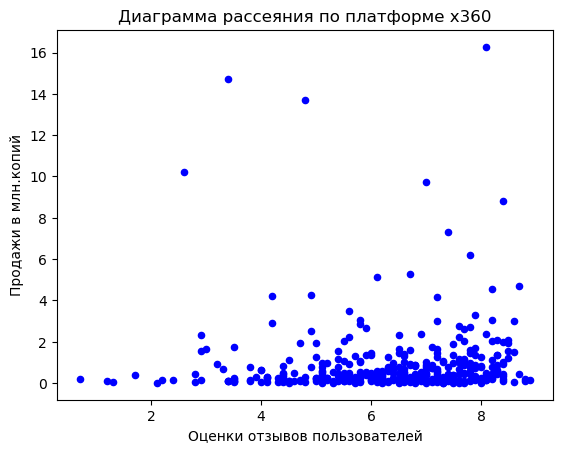

critic_score        0.391253
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

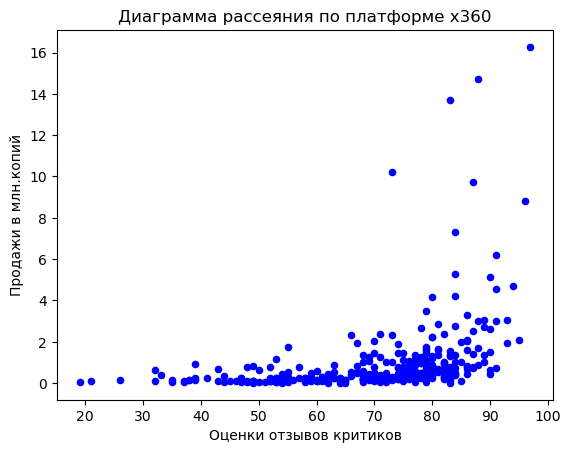

Расчет по Платформе xone


user_score         -0.068925
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

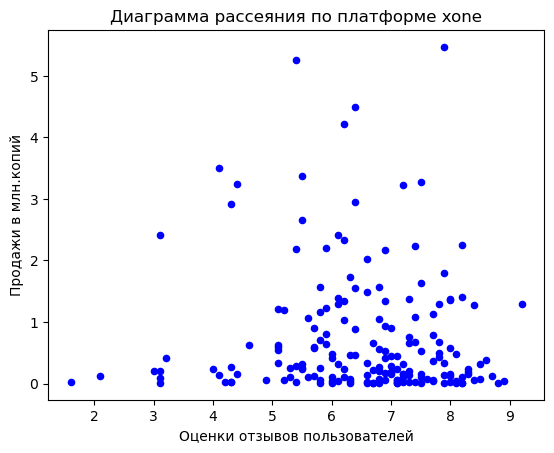

critic_score        0.416998
cumulative_sales    1.000000
Name: cumulative_sales, dtype: float64

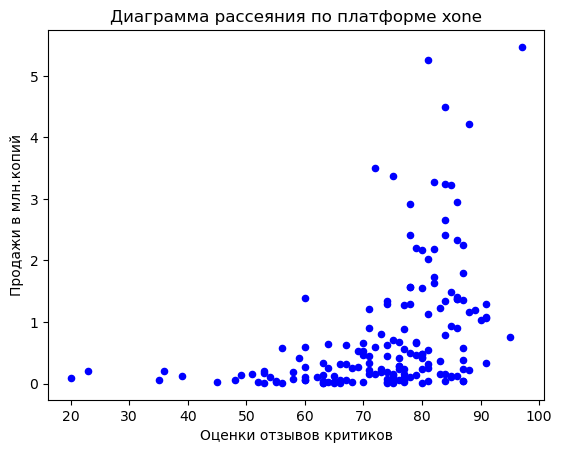

In [127]:
# Комментарий ревьюера 3
import matplotlib.pyplot as plt
df_sc, y = games[games['year_of_release'] > 2010].copy(), 'cumulative_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

По всем платформам корреляция как по оценкам критиков, так и по оценкам пользователей ниже 0.5, то есть влияние оценок не такое сильное, хотя оценка критиков больше влияет на продажи, чем оценка пользователей. <br/>
На продажи Wii и DS оценки практически не повлияли, возможно, это связано с тем, что рынок начали завоевывать консоли Play Station и Xbox..


#### Общее распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

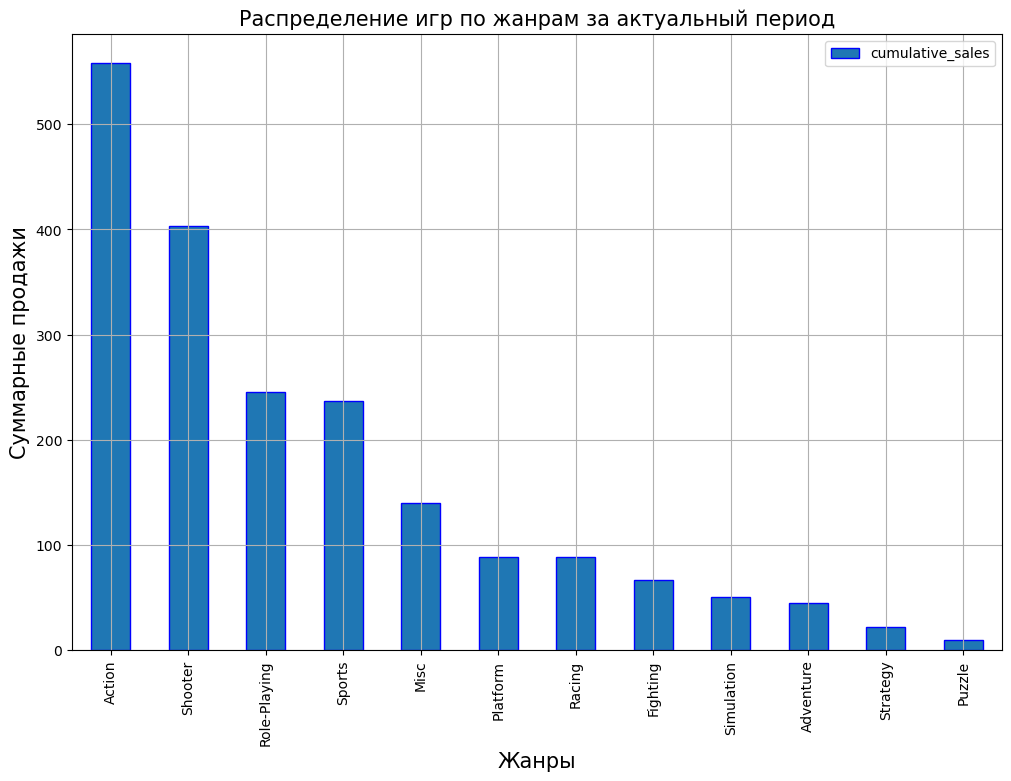

In [128]:
# Построение диаграммы распределения по жанрам за актуальный период

genre_distribution = games[(games['year_of_release'] > 2010)].copy()
genre_distribution = genre_distribution.groupby('genre').agg({'cumulative_sales': 'sum'}) \
                        .sort_values(by='cumulative_sales', ascending=False)
genre_distribution.plot(kind='bar', ec='blue', figsize=(12,8))

plt.title('Распределение игр по жанрам за актуальный период', fontsize=15)
plt.xlabel('Жанры', fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.grid()
plt.show()

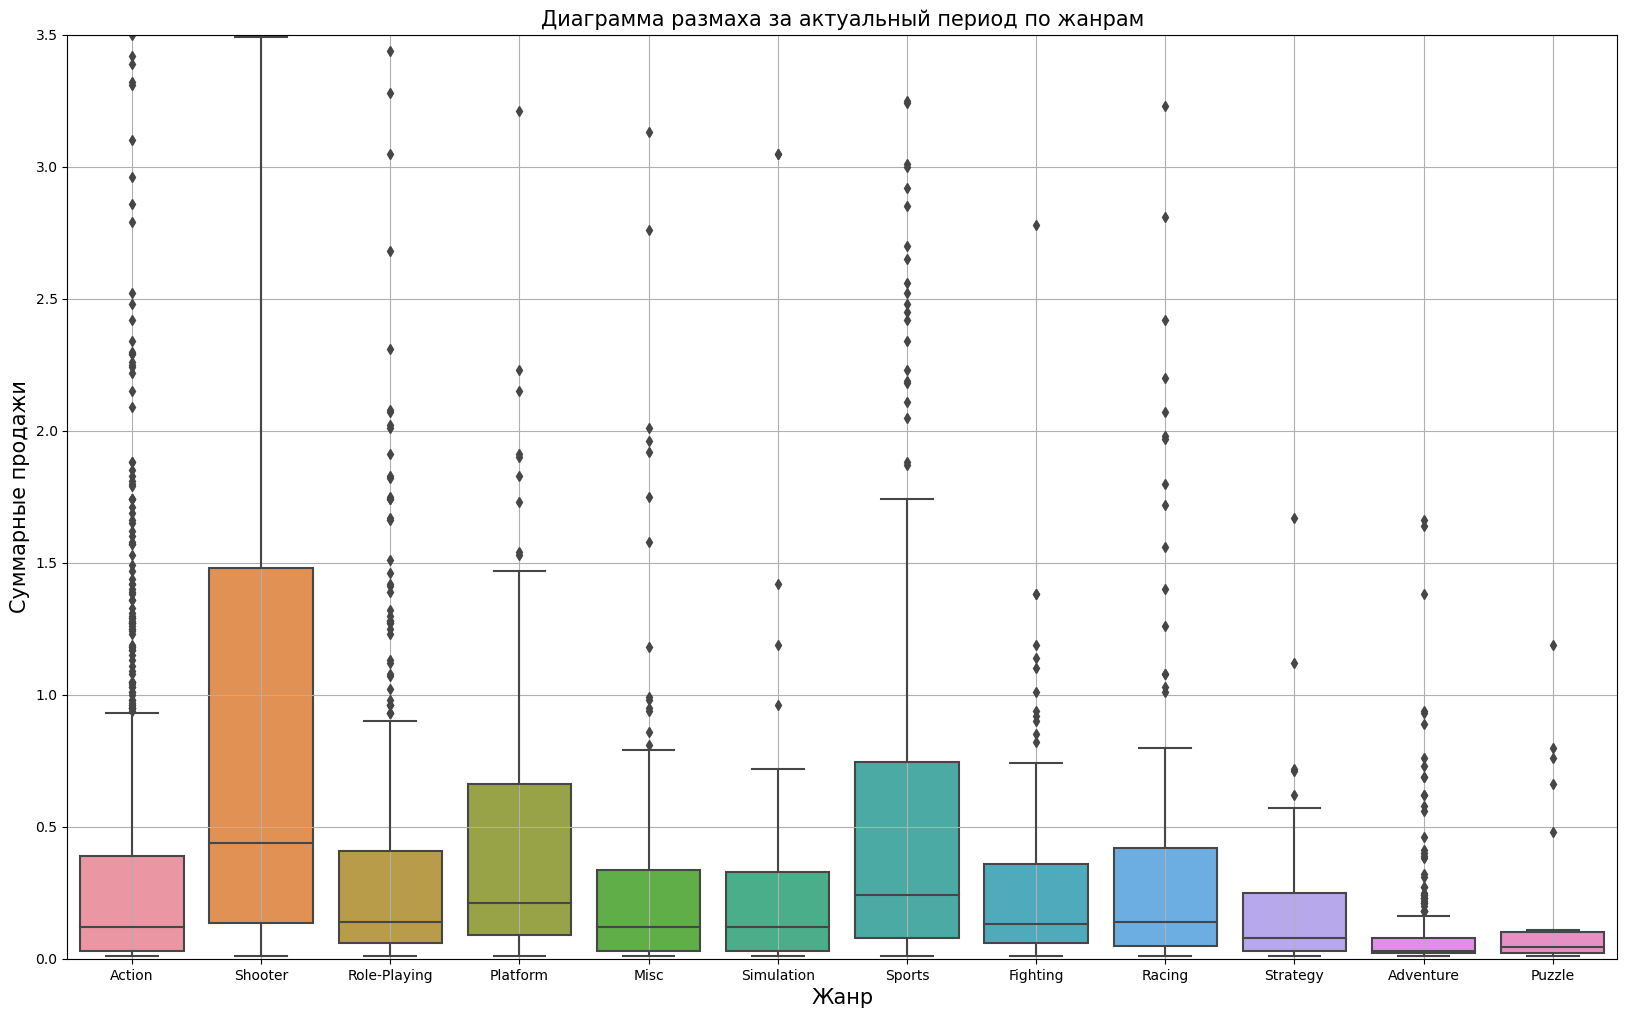

In [129]:
# Диаграмма размаха по жанрам за актуальный период

plt.figure(figsize=(20,12))

sns.boxplot(data=df_top_platforms, x='genre', y='cumulative_sales')

plt.title('Диаграмма размаха за актуальный период по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Суммарные продажи',fontsize=15)
plt.grid()
plt.ylim(0, 3.5)
plt.show()

<font color='Blue'> <b>Выводы - <br/>
    Действительно, две диаграммы показывают две разные картины:<br/>
<p><p/>
В диаграмме распределения жанры Action и Shooter в топе производства за актуальный период - свыше 500 млн и 400 млн копий соответственно.<br/>
Продажи игр в жанре Спорт и Ролевые игры перевалили отметку за 200 млн копий.<br/>
Свыше 100 млн копий реализовано по жанрам (по возрастанию) как Miscellaneous.<br/>
В аутсайдерах жанры Гонки Паззлы, Стратегии, Драки, Симуляции...<br/>
Но, конечно, на чистую прибыль также влияют затраты на разработку игр. <br/>
Показатель рентабельности отразил бы более ясную картину прибыльности игр по жанрам.<br/>
    <p><p/>
    В диаграмме рассеивания медианное значение Шутеров больше, чем у Экшн. Верхний предел также в три раза выше.<br/>
    Также, показатели жанров Гонки, Драки и Спортивные игры выше, чем у Экшн.<br/></font>

### Шаг 4. Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):<br/>
<p><p/>
- Самые популярные платформы (топ-5). Опишите различия в долях продаж. <br/>
- Самые популярные жанры (топ-5). Поясните разницу.<br/>
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br/>

####  Самые популярные платформы (топ-5)

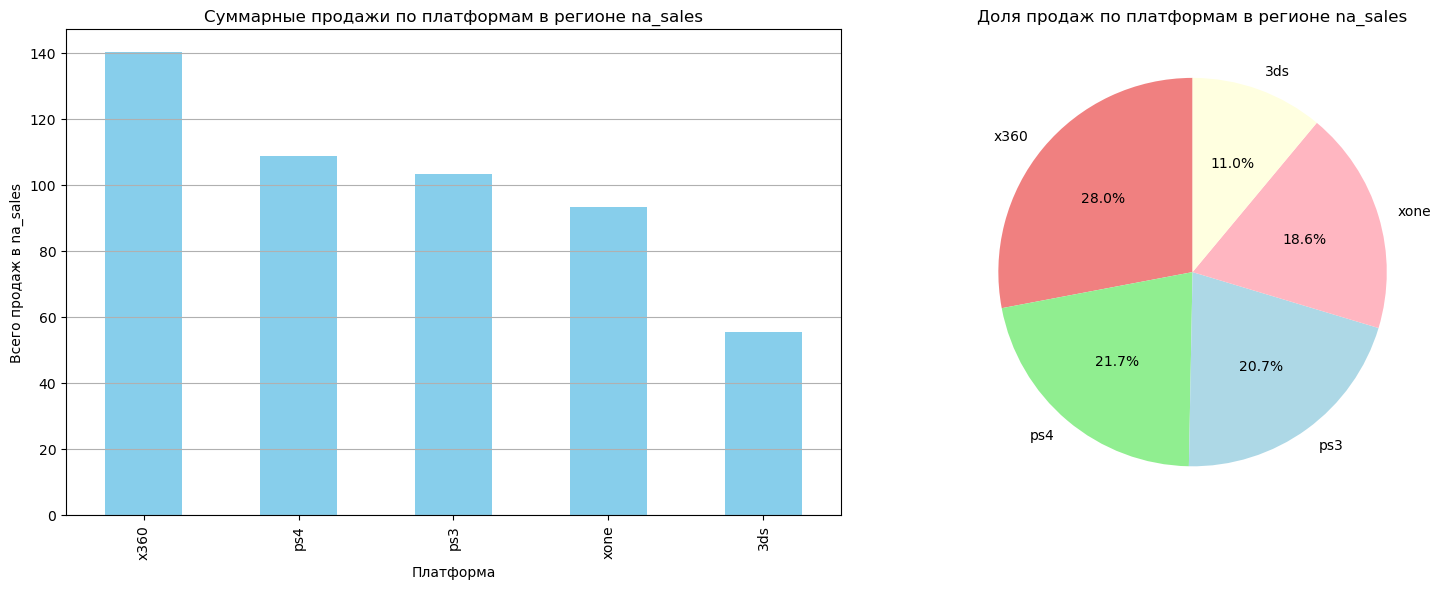

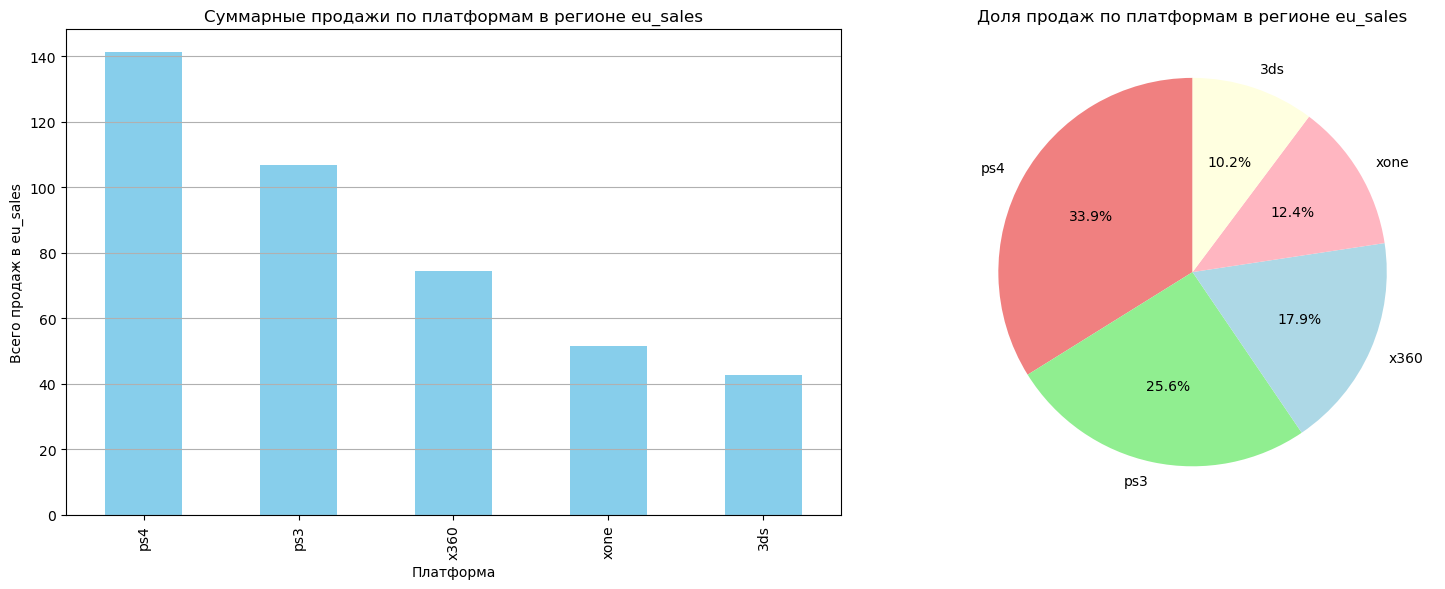

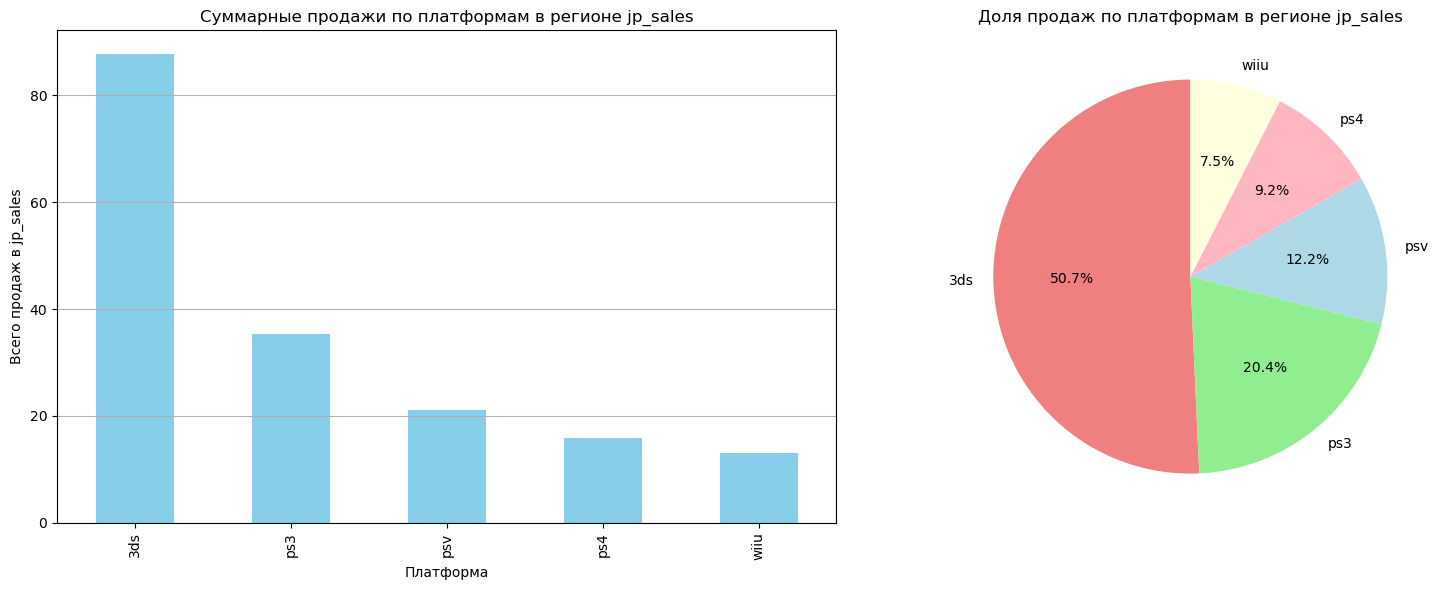

In [130]:
def plot_region_totals(games, region_column):
    region_totals = games[games['year_of_release'] > 2011].groupby('platform')[region_column].sum()\
        .sort_values(ascending=False).head(5)
    
    # Создание фигуры с двумя графиками в ряд
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    # График столбчатой диаграммы
    region_totals.plot(kind='bar', color='skyblue', ax=axes[0])
    axes[0].set_title(f'Суммарные продажи по платформам в регионе {region_column}')
    axes[0].set_xlabel('Платформа')
    axes[0].set_ylabel(f'Всего продаж в {region_column}')
    axes[0].grid(axis='y')

    # Круговая диаграмма
    region_totals.plot.pie(autopct='%1.1f%%', startangle=90, \
                           colors=['lightcoral', 'lightgreen', 'lightblue', 'lightpink', 'lightyellow'], ax=axes[1])
    axes[1].set_title(f'Доля продаж по платформам в регионе {region_column}')
    axes[1].set_ylabel('')  # Удаляем надпись с названием оси Y для круговой диаграммы
    
    plt.tight_layout()
    plt.show()

plot_region_totals(games, 'na_sales')
plot_region_totals(games, 'eu_sales')
plot_region_totals(games, 'jp_sales')


<font color='Blue'> <b>rev.02 Выводы - <br/>
    В Северной Америке в лидерах продаж приставки X360, PS4 & PS3 за актуальный период.<br/>
    В Европе схожая картина, только пользователи больше предпочитали PS4. Консоль PS3 на втором месте по продажам. На третьем месте X360. <br/>
    Японцы, как производители консолей предочитают больше всего 3DS, PLay Station 3 и PSP.<br/>
<p><p/>
По объемам продаж по топовым платформам на рынке Северной Америки было реализовано больше игр, чем в Европе и в Японии.</font>

#### Самые популярные жанры (топ-5)

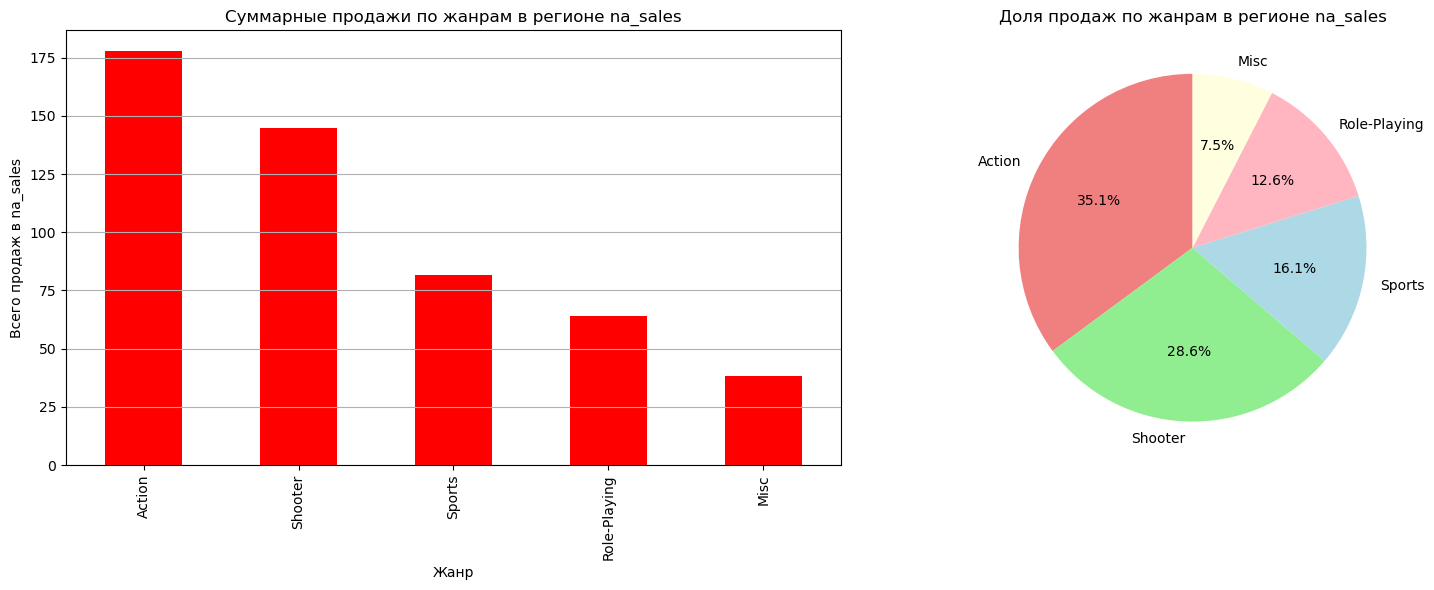

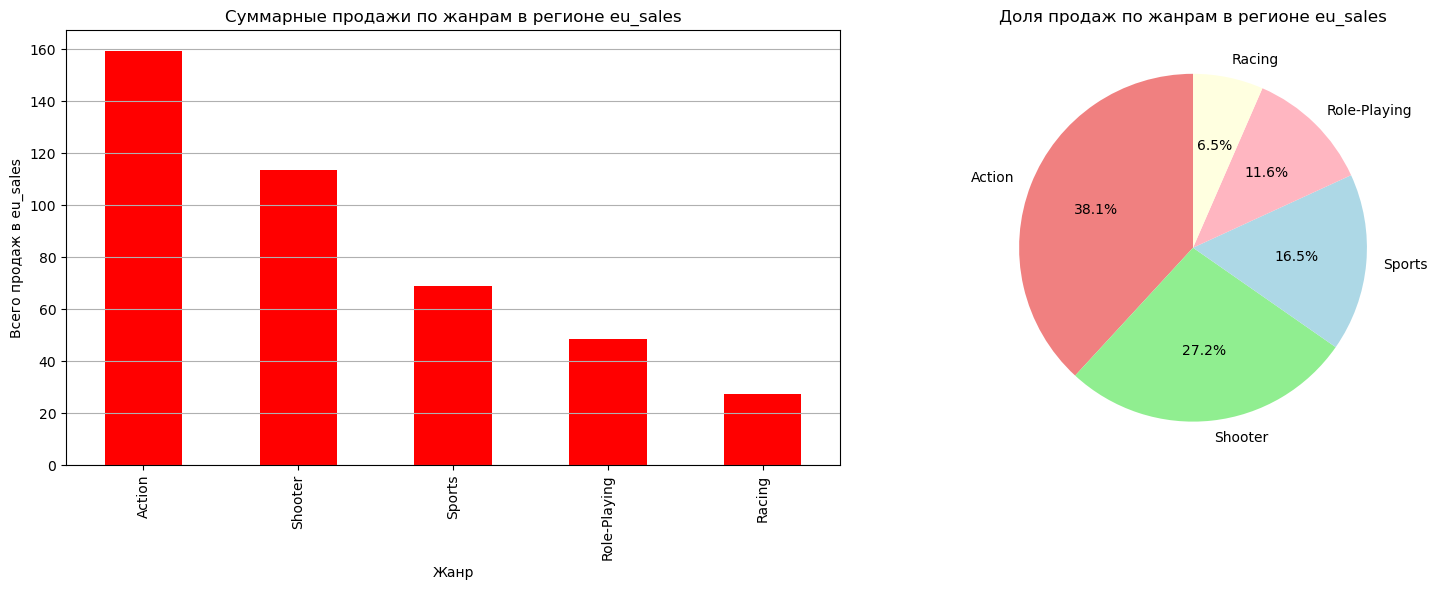

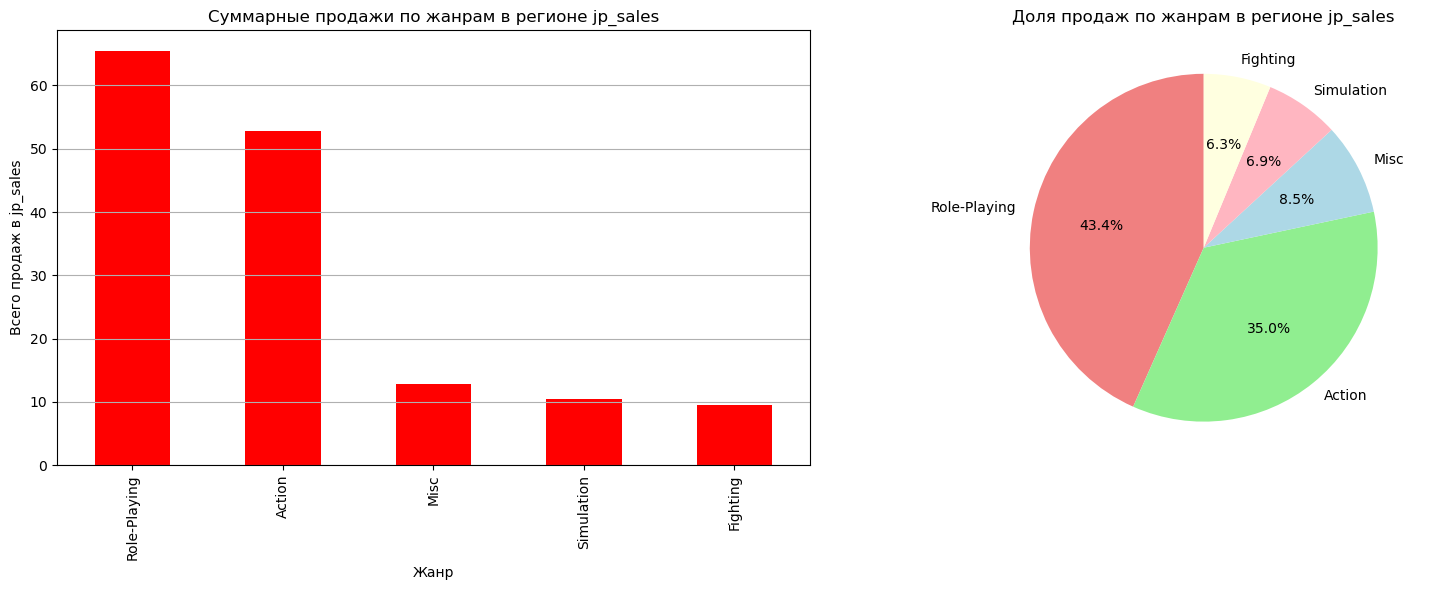

In [131]:
def plot_region_genre_totals(games, genre_column):
    genre_totals = games[games['year_of_release'] > 2011].groupby('genre')[genre_column].sum()\
        .sort_values(ascending=False).head(5) 
    
    # Создание фигуры с двумя графиками в ряд
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    # График столбчатой диаграммы
    genre_totals.plot(kind='bar', color='red', ax=axes[0])
    axes[0].set_title(f'Суммарные продажи по жанрам в регионе {genre_column}')
    axes[0].set_xlabel('Жанр')
    axes[0].set_ylabel(f'Всего продаж в {genre_column}')
    axes[0].grid(axis='y')

    # Круговая диаграмма
    genre_totals.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue', 'lightpink', 'lightyellow'], ax=axes[1])
    axes[1].set_title(f'Доля продаж по жанрам в регионе {genre_column}')
    axes[1].set_ylabel('')  # Удаляем надпись с названием оси Y для круговой диаграммы
    
    plt.tight_layout()
    plt.show()

plot_region_genre_totals(games, 'na_sales')
plot_region_genre_totals(games, 'eu_sales')
plot_region_genre_totals(games, 'jp_sales')


<font color='Blue'> <b>Выводы - <br/>
    В Северной Америке и в Европе в лидерах за актуальный период игры в жанрах Экшн, Шутер и Спорт.<br/>
    Японцы больше предпочитают Ролевые игры, затем жанр Экшн и различные жанры.<br/>
<p><p/>

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [132]:
games['rating'].unique()

array(['E', 'unrated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Расшифровка рейтингов организации ESRB (Entertainment Software Rating Board): <br/>
<p><p/>
«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Первоначально "K-A" ("Kids to Adults");<br/>
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет; <br/>
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;<br/>
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;<br/>
"K-A" ("Kids to Adults") - первоначальное название рейтинга "Е";<br/>
«AO» («Adults Only 18+») — «Только для взрослых»;<br/>
 «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет;<br/>
 «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

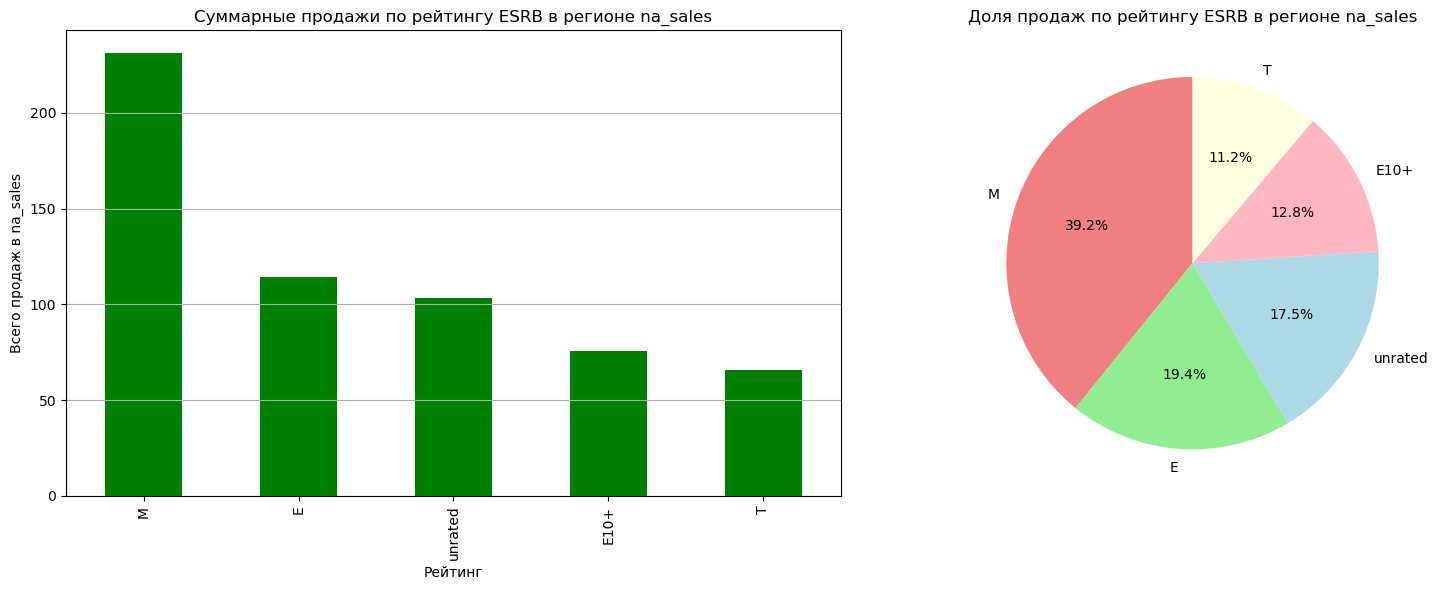

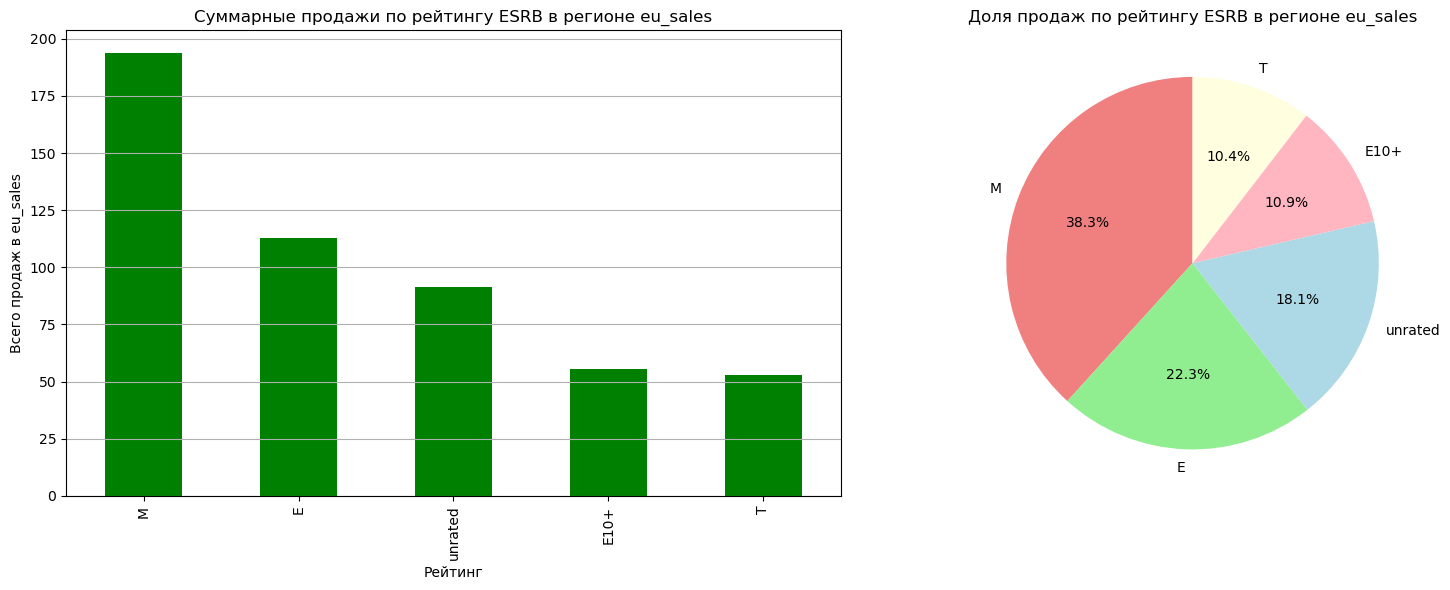

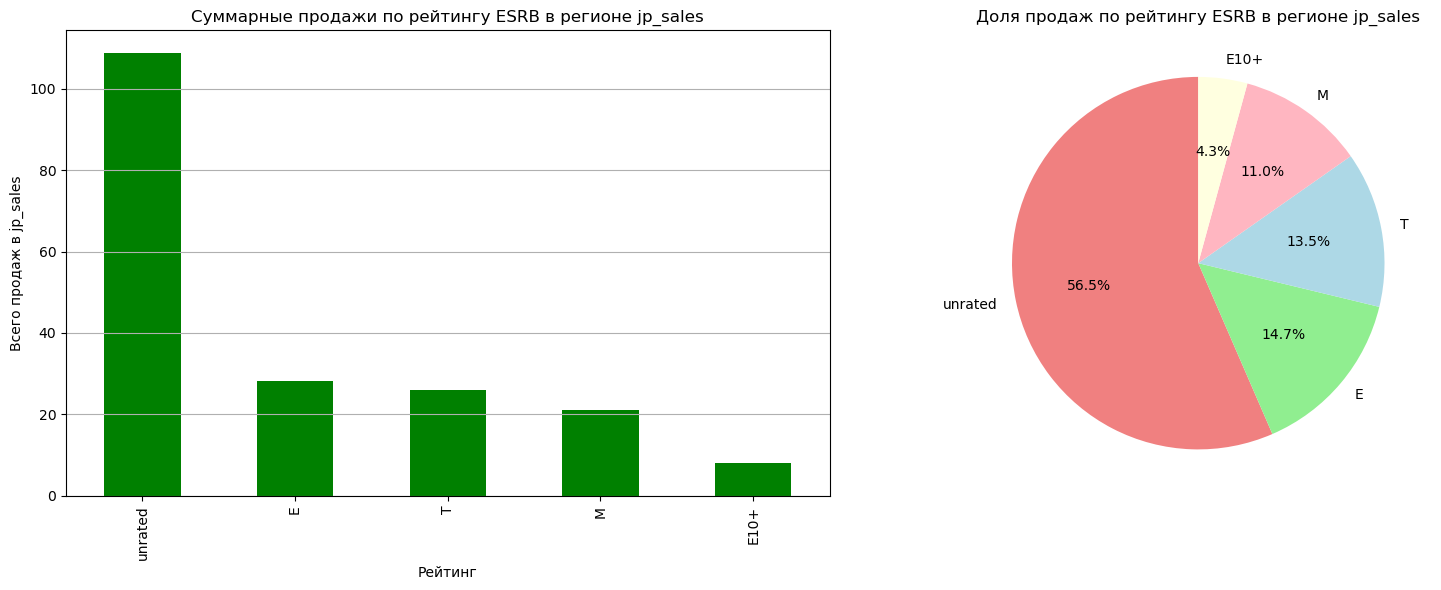

In [133]:
def plot_region_esrb_totals(games, esrb_column):
    esrb_totals = games[games['year_of_release'] > 2011].groupby('rating')[esrb_column].sum()\
        .sort_values(ascending=False).head(5) 
    
    # Создание фигуры с двумя графиками в ряд
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    # График столбчатой диаграммы
    esrb_totals.plot(kind='bar', color='green', ax=axes[0])
    axes[0].set_title(f'Суммарные продажи по рейтингу ESRB в регионе {esrb_column}')
    axes[0].set_xlabel('Рейтинг')
    axes[0].set_ylabel(f'Всего продаж в {esrb_column}')
    axes[0].grid(axis='y')

    # Круговая диаграмма
    esrb_totals.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue', 'lightpink', 'lightyellow'], ax=axes[1])
    axes[1].set_title(f'Доля продаж по рейтингу ESRB в регионе {esrb_column}')
    axes[1].set_ylabel('')  # Удаляем надпись с названием оси Y для круговой диаграммы
    
    plt.tight_layout()
    plt.show()

plot_region_esrb_totals(games, 'na_sales')
plot_region_esrb_totals(games, 'eu_sales')
plot_region_esrb_totals(games, 'jp_sales')


<font color='Blue'> <b> В Европе и в Сев. Америке рейтинг организации ESRB сильное влияние оказывает на игры категории "17+" и игр "Для всех". <br/>
В Японии на рейтинг особо не обращают внимания. Больше всего игр "неоцененных" в рейтинге.<br/></font>

### Шаг 5. Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br/>
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br/><p><p/>
Задайте самостоятельно пороговое значение alpha.<br/><p><p/>
Поясните:<br/>
Как вы сформулировали нулевую и альтернативную гипотезы;<br/>
Какой критерий применили для проверки гипотез и почему.

<font color='Blue'> <b>Нулевая гипотеза Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br/>
    Альтернативная гипотеза Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны между собой. <br/></font>

In [134]:
# проверим гипотезы
# создаем датафрейм с данными только для 'Xbox One'
#df_xbox = games.loc[games['platform'] == 'XOne']

df_xbox = games[(games['platform'] == 'xone') & (games['user_score'] > 0) & (games['year_of_release'] > 2010)]
#display(df_xbox.head(10))

In [135]:
# создаем датафрейм с данными только для 'PC'
#df_pc = games.loc[games['platform'] == 'PC']

df_pc = games[(games['platform'] == 'pc') & (games['user_score'] > 0) & (games['year_of_release'] > 2010)]
#display(df_pc.head(10))

In [136]:
# Проверим нулевую гипотезу Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

alpha = 0.05

results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score']) #alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')


p-value: 0.6267602271422398
Вывод: Нет оснований отвергнуть нулевую гипотезу


In [137]:
# Комментарий ревьюера
df_xbox['user_score'].min(), df_pc['user_score'].min()

(1.6, 1.4)

<font color='Blue'> <b>Нулевую гипотезу не отвергаем. Cредние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. <br/>
    Здесь проверили двустороннюю гипотезу о равенстве двух генеральных совокупносте.<br/></font>

<font color='Blue'> <b>Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. <br/>
    Альтернативная гипотеза Н1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. <br/></font>

In [138]:
# создаем датафрейм с данными только для 'Action'
#df_action = games.loc[games['genre'] == 'Action']
#display(df_action)

df_action = games[(games['genre'] == 'Action') & (games['user_score'] > 0) & (games['year_of_release'] > 2010)]
#display(df_action.head(10))

In [139]:
# создаем датафрейм с данными только для 'Sports'
#df_sport = games.loc[games['genre'] == 'Sports']
#display(df_sport)

df_sport = games[(games['genre'] == 'Sports') & (games['user_score'] > 0) & (games['year_of_release'] > 2010)]
#display(df_sport.head(10))

In [140]:
# Проверим нулевую гипотезу Н0: Средние пользовательские рейтинги жанров 
# Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

#alpha = 0.05

results = st.ttest_ind(df_action['user_score'], df_sport['user_score'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')


p-value: 3.350323745333544e-24
Вывод: Отвергаем нулевую гипотезу


<font color='Blue'> <b>Отвергаем гипотезу Н0 о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. <br/>
    Здесь проверили правостороннюю гипотезу о равенстве двух генеральных совокупносте.<br/></font></font><b><b/>

### Шаг 6. Общий вывод

<font color='Blue'> <b>rev.02:</b><br/>
    <b>В ходе анализа были проделаны следующие действия:</b><br/><p><p/>
    Провели предобработку данных:<br/> 
    - заменили шрифты в названиях столбцов,<br/>
    - заменили пропуски в столбцах с оценками критиков и пользователей,<br/>
    - удалили пропуски в столбце года выпуска игр,<br/>
    - проверили и удалил две строки дубликатов,<br/><p><p/>
    Сделали исследовательский анализ данных:<br/> 
    - анализ динамики производства игр по годам и платформам,<br/>
    - анализ динамики производства за актуальный период 2011-2016 гг,<br/>
    - построили диаграмму размаха по жанрам,<br/>
    - провели анализ одной популярной платформы отдельно и других топовых платформ за актуальный период,<br/>
    - посмотрели как влияет на продажу оценки критиков и пользователей,<br/>
    - общее распределение по жанрам, их сравнительный объем продаж. <br/><p><p/>
    Анализ пользователей по регионамс за актуальный период:<br/> 
    - анализ популярных платформ и жанров игр, продаваемых в разных регионах,<br/>
    - влияние рейтинга ESRB на продажи в регионах.<br/>
    <p><p/>
    <b>Выводы:</b><br/><p><p/>
    - Рынок консольных и десктопных игр падает. И, возможно, падение продолжится, если на замену не придут более продвинутые платформы.<br/>
    - Их нишу всё больше занимают мобильные игры, которые выигрывают по стоимости, удобству использования, "доставке" клиенту, массовому распространению, рекламе и т.д.<br/>
    - Оценки критиков больше всего влияют на продажу, чем пользовательские рейтинги. Надо больше работать в этом направлении, привлекать больше критиков, профессионалов в этом деле.<br/>
    - Производителям игр нужно диверсифицировать рынок игр, найдя баланс между консольными и мобильными играми, с учетом технических параметров приложений.<br/>
    За период 2012 - 2016 гг:<br/>
    - В Северной Америке в топе 5 платформ Xbox занимает 28.0% продаж, PS4 - 21.7%, PS3 - 20.7%. Игры в топе 5 жанров Action (35.1%) / Shooter (28.6%) / Sports (16.1%), по рейтингу ESRB в топе игры "Для всех" и "17+".<br/>
     - В Европе в топе 5 платформ PS4 занимает 33.9% продаж, PS3 - 25.6%, Xbox - 17.9%. Игры в топе 5 жанров Action (38.1%) / Shooter (27.2%) / Sports (16.5%), по рейтингу ESRB в топе игры "Для всех" и "17+".<br/>
    - В Японии в топе 5 платформ 3DS занимает 50.7% продаж, PS3 - 20.4%. Игры в топе 5 жанров Role-Playing (43.4%) / Action (35%).<br/><p><p/>
    <b>По результатам анализа акцент в ближайшем будущем стоит делать на приведенные выше данные, то есть платформы и жанры, которые имеют наибольший удельный вес в продажах по регионам. Также нужно обращать внимание на оценки критиков в регионах Северной Америки и Европы.</b><br/></font>

    